In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
plt.style.use('ggplot')
import pprint
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Collecting data from the top 5 European leagues

# Ligue 1

In [13]:
# I'll be using football api to extract the data. In order to get all the players stats, we need to take several 
# steps to collect league_ids, team_ids and finally all the player_ids. Once we have all the player_ids we can
# request the stats for each one of them.

In [2]:
url = "https://api-football-v1.p.rapidapi.com/v2/leagues/country/france"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

In [ ]:
# "https://api-football-v1.p.rapidapi.com/v2/leagues/country/france" will show all league_ids for the selected 
# country which in this case is France.

In [3]:
print(response.text)

{"api":{"results":130,"leagues":[{"league_id":4,"name":"Ligue 1","type":"League","country":"France","country_code":"FR","season":2018,"season_start":"2018-08-10","season_end":"2019-05-24","logo":"https:\/\/media.api-sports.io\/football\/leagues\/61.png","flag":"https:\/\/media.api-sports.io\/flags\/fr.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true,"odds":false}},{"league_id":5,"name":"Ligue 2","type":"League","country":"France","country_code":"FR","season":2018,"season_start":"2018-07-27","season_end":"2019-05-17","logo":"https:\/\/media.api-sports.io\/football\/leagues\/62.png","flag":"https:\/\/media.api-sports.io\/flags\/fr.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true,"odds":fal

In [14]:
# From the first line of text generated we now know that Ligue 1 has '4' as it's league_id
# which we can now use to be able to find the team_ids that participate in that league.

In [2]:
url = "https://api-football-v1.p.rapidapi.com/v2/teams/league/4"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

In [18]:
teams_ligue1 = json.loads(response.text)

In [19]:
teams_ligue1

{'api': {'results': 20,
  'teams': [{'team_id': 85,
    'name': 'Paris Saint Germain',
    'code': 'PSG',
    'logo': 'https://media.api-sports.io/football/teams/85.png',
    'country': 'France',
    'is_national': False,
    'founded': 1970,
    'venue_name': 'Parc des Princes',
    'venue_surface': 'grass',
    'venue_address': '24, rue du Commandant Guilbaud',
    'venue_city': 'Paris',
    'venue_capacity': 47929},
   {'team_id': 88,
    'name': 'Caen',
    'code': 'CAE',
    'logo': 'https://media.api-sports.io/football/teams/88.png',
    'country': 'France',
    'is_national': False,
    'founded': 1897,
    'venue_name': "Stade Michel d'Ornano",
    'venue_surface': 'grass',
    'venue_address': 'Boulevard Georges Pompidou',
    'venue_city': 'Caen',
    'venue_capacity': 20453},
   {'team_id': 78,
    'name': 'Bordeaux',
    'code': 'BOR',
    'logo': 'https://media.api-sports.io/football/teams/78.png',
    'country': 'France',
    'is_national': False,
    'founded': 1881,
   

In [20]:
teams_ligue1 = teams_ligue1['api']['teams']

In [21]:
# creating a dataframe to visualize all teams info.

In [22]:
teams_ligue1 = pd.DataFrame(teams_ligue1)

In [23]:
teams_ligue1.head()

team_id                 name code  \
0       85  Paris Saint Germain  PSG   
1       88                 Caen  CAE   
2       78             Bordeaux  BOR   
3       95           Strasbourg  STR   
4       80                 Lyon  LYO   

                                                logo country  is_national  \
0  https://media.api-sports.io/football/teams/85.png  France        False   
1  https://media.api-sports.io/football/teams/88.png  France        False   
2  https://media.api-sports.io/football/teams/78.png  France        False   
3  https://media.api-sports.io/football/teams/95.png  France        False   
4  https://media.api-sports.io/football/teams/80.png  France        False   

   founded               venue_name venue_surface  \
0     1970         Parc des Princes         grass   
1     1897    Stade Michel d'Ornano         grass   
2     1881  Stade Matmut-Atlantique         grass   
3     1906       Stade de la Meinau         grass   
4     1950         Groupama Stadium         grass   

                    venue_address        venue_city  venue_capacity  
0  24, rue du Commandant Guilbaud             Paris           47929  
1      Boulevard Georges Pompidou              Caen           20453  
2          Cours Jules Ladoumegue          Bordeaux           42115  
3   12, rue de l&apos;Extenwoerth        Strasbourg           26109  
4               Chemin du Montout  Décines-Charpieu           59186

In [11]:
squad_num = teams_ligue1['team_id'].tolist()

In [26]:
# I can use the list created with all team_ids to loop through all teams and pull all the players general info.

In [12]:
allplayers = []

In [13]:
for squad in squad_num:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/squad/{squad}/2019-2020'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        allplayers.append(r)  

In [64]:
# I can now create a list with all the player_ids.

In [14]:
statspl = []

In [15]:
for i in range(1000):
    for j in range(1000):
        try:
            statspl.append(allplayers[i]['api']['players'][j]['player_id'])                                     
        except:
            continue

In [67]:
# I will use the player_ids list to loop through and request all the player_stats and append it to a final list.
# Once I have the final list I can create a dataframe.

In [16]:
pl_stats = []

In [17]:
for player in statspl:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/player/{player}'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        pl_stats.append(r)

In [18]:
len(pl_stats)

690

In [71]:
final_pl_list = []

In [72]:
for i in range(1000):
    for j in range(1000):
        try:
            final_pl_list.append(pl_stats[i]['api']['players'][j])                                     
        except:
            continue

In [73]:
pl_df = pd.DataFrame(final_pl_list)

In [68]:
# Due to most of the stats being nested into different dictionaries, I'll need to split these into different 
# columns as shown below with lambda functions.

In [74]:
pl_df['goals_scored'] = pl_df['goals'].apply(lambda x: x['total'])
pl_df['goals_conceded'] = pl_df['goals'].apply(lambda x: x['conceded'])
pl_df['assists'] = pl_df['goals'].apply(lambda x: x['assists'])
pl_df['saves'] = pl_df['goals'].apply(lambda x: x['saves'])
pl_df.drop(['goals'], axis=1, inplace=True)
pl_df['total_shots'] = pl_df['shots'].apply(lambda x: x['total'])
pl_df['shots_on_target'] = pl_df['shots'].apply(lambda x: x['on'])
pl_df.drop(['shots'], axis=1, inplace=True)
pl_df['total_passes'] = pl_df['passes'].apply(lambda x: x['total'])
pl_df['key_passes'] = pl_df['passes'].apply(lambda x: x['key'])
pl_df['passing_accuracy'] = pl_df['passes'].apply(lambda x: x['accuracy'])
pl_df.drop(['passes'], axis=1, inplace=True)
pl_df['total_tackles'] = pl_df['tackles'].apply(lambda x: x['total'])
pl_df['blocks'] = pl_df['tackles'].apply(lambda x: x['blocks'])
pl_df['interceptions'] = pl_df['tackles'].apply(lambda x: x['interceptions'])
pl_df.drop(['tackles'], axis=1, inplace=True)
pl_df['total_duels'] = pl_df['duels'].apply(lambda x: x['total'])
pl_df['duels_won'] = pl_df['duels'].apply(lambda x: x['won'])
pl_df.drop(['duels'], axis=1, inplace=True)
pl_df['dribbles_attempts'] = pl_df['dribbles'].apply(lambda x: x['attempts'])
pl_df['successful_dribbles'] = pl_df['dribbles'].apply(lambda x: x['success'])
pl_df.drop(['dribbles'], axis=1, inplace=True)
pl_df['fouls_drawn'] = pl_df['fouls'].apply(lambda x: x['drawn'])
pl_df['fouls_committed'] = pl_df['fouls'].apply(lambda x: x['committed'])
pl_df.drop(['fouls'], axis=1, inplace=True)
pl_df['yellow_card'] = pl_df['cards'].apply(lambda x: x['yellow'])
pl_df['red_card'] = pl_df['cards'].apply(lambda x: x['red'])
pl_df['yellowred_card'] = pl_df['cards'].apply(lambda x: x['yellowred'])
pl_df.drop(['cards'], axis=1, inplace=True)
pl_df['penalties_won'] = pl_df['penalty'].apply(lambda x: x['won'])
pl_df['penalties_commited'] = pl_df['penalty'].apply(lambda x: x['commited'])
pl_df['penalties_scored'] = pl_df['penalty'].apply(lambda x: x['success'])
pl_df['penalties_missed'] = pl_df['penalty'].apply(lambda x: x['missed'])
pl_df['penalties_saved'] = pl_df['penalty'].apply(lambda x: x['saved'])
pl_df.drop(['penalty'], axis=1, inplace=True)
pl_df['appearences'] = pl_df['games'].apply(lambda x: x['appearences'])
pl_df['minutes_played'] = pl_df['games'].apply(lambda x: x['minutes_played'])
pl_df['lineups'] = pl_df['games'].apply(lambda x: x['lineups'])
pl_df.drop(['games'], axis=1, inplace=True)
pl_df['subbed_on'] = pl_df['substitutes'].apply(lambda x: x['in'])
pl_df['subbed_off'] = pl_df['substitutes'].apply(lambda x: x['out'])
pl_df['bench'] = pl_df['substitutes'].apply(lambda x: x['bench'])
pl_df.drop(['substitutes'], axis=1, inplace=True)

In [9]:
# create function to drop unwanted columns

def drop_cols(df, columns):
    return df.drop(columns, axis=1, inplace=True)

In [76]:
drop_cols(pl_df, ['player_id', 'firstname', 'lastname', 'number', 'birth_date', 'birth_place', 'injured', 'team_id', 'league_id', 'captain'])

In [69]:
# Time to see how the dataframe actually looks like.

In [77]:
pl_df.head()

player_name  position  age birth_country nationality  height weight  \
0  L. Mbe Soh  Defender   19      Cameroon      France  186 cm   None   
1  L. Mbe Soh  Defender   19      Cameroon      France  186 cm   None   
2  L. Mbe Soh  Defender   19      Cameroon      France  186 cm   None   
3  L. Mbe Soh  Defender   19      Cameroon      France  186 cm   None   
4  L. Mbe Soh  Defender   19      Cameroon      France  186 cm   None   

     rating            team_name             league  ... penalties_commited  \
0  6.800000    Nottingham Forest       Championship  ...                  0   
1  6.800000  Paris Saint Germain            Ligue 1  ...                  0   
2  6.900000  Paris Saint Germain            Ligue 1  ...                  0   
3      None  Paris Saint Germain  Coupe de la Ligue  ...                  0   
4      None  Paris Saint Germain    Coupe de France  ...                  0   

   penalties_scored  penalties_missed  penalties_saved  appearences  \
0                 0                 0                0            2   
1                 0                 0                0            1   
2                 0                 0                0            2   
3                 0                 0                0            0   
4                 0                 0                0            0   

   minutes_played  lineups  subbed_on  subbed_off  bench  
0             180        2          0           0      6  
1              59        1          0           1      3  
2             180        2          0           0      3  
3               0        0          0           0      0  
4               0        0          0           0      1  

[5 rows x 43 columns]

In [78]:
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15302 entries, 0 to 15301
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_name          15302 non-null  object
 1   position             15270 non-null  object
 2   age                  15302 non-null  int64 
 3   birth_country        15302 non-null  object
 4   nationality          15302 non-null  object
 5   height               15015 non-null  object
 6   weight               14572 non-null  object
 7   rating               4818 non-null   object
 8   team_name            15260 non-null  object
 9   league               15302 non-null  object
 10  season               15302 non-null  object
 11  goals_scored         15302 non-null  int64 
 12  goals_conceded       15302 non-null  int64 
 13  assists              15302 non-null  int64 
 14  saves                15302 non-null  int64 
 15  total_shots          15302 non-null  int64 
 16  shot

In [70]:
# There are a lot of null values for 'rating' which I will drop.

In [65]:
pl_df.dropna(inplace=True)

In [66]:
#pl_df.to_csv('ligue1.csv')

In [67]:
france = pd.read_csv('ligue1.csv')

In [72]:
# To be able to use the physical characteristics at the modeling stage, we need to convert height and weight
# into floats.

In [68]:
france['height'] = france['height'].apply(lambda x: x.replace('cm', '')).astype(float)
france['weight'] = france['weight'].apply(lambda x: x.replace('kg', '')).astype(float)

In [69]:
france = france.rename(columns= {'weight' : 'weight_kgs', 'height' : 'height_cms'})

In [80]:
france.head()

Unnamed: 0  player_name    position  age birth_country nationality  \
0           9  Sergio Rico  Goalkeeper   27         Spain       Spain   
1          10  Sergio Rico  Goalkeeper   27         Spain       Spain   
2          12  Sergio Rico  Goalkeeper   27         Spain       Spain   
3          13  Sergio Rico  Goalkeeper   27         Spain       Spain   
4          14  Sergio Rico  Goalkeeper   27         Spain       Spain   

   height_cms  weight_kgs    rating            team_name  ...  \
0       194.0        90.0  6.750000  Paris Saint Germain  ...   
1       194.0        90.0  6.350000  Paris Saint Germain  ...   
2       194.0        90.0  6.751724               Fulham  ...   
3       194.0        90.0  6.695833              Sevilla  ...   
4       194.0        90.0  6.902857              Sevilla  ...   

  penalties_commited penalties_scored  penalties_missed  penalties_saved  \
0                  0                0                 0                0   
1                  0                0                 0                0   
2                  0                0                 0                0   
3                  0                0                 0                1   
4                  0                0                 0                1   

   appearences  minutes_played  lineups  subbed_on  subbed_off  bench  
0            2             180        2          0           0      5  
1            2             180        2          0           0     21  
2           29            2610       29          0           0      6  
3           24            2155       23          1           0     15  
4           35            3150       35          0           0      3  

[5 rows x 44 columns]

In [74]:
# I'll now repeat the same process for each league I want to analyse.

# La Liga

In [82]:
url = "https://api-football-v1.p.rapidapi.com/v2/leagues/country/spain"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

print(response.text)

{"api":{"results":73,"leagues":[{"league_id":30,"name":"Primera Division","type":"League","country":"Spain","country_code":"ES","season":2017,"season_start":"2017-08-18","season_end":"2018-05-20","logo":"https:\/\/media.api-sports.io\/football\/leagues\/140.png","flag":"https:\/\/media.api-sports.io\/flags\/es.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true,"odds":false}},{"league_id":33,"name":"Segunda Division","type":"League","country":"Spain","country_code":"ES","season":2017,"season_start":"2017-08-18","season_end":"2018-06-16","logo":"https:\/\/media.api-sports.io\/football\/leagues\/141.png","flag":"https:\/\/media.api-sports.io\/flags\/es.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictio

In [83]:
url = "https://api-football-v1.p.rapidapi.com/v2/teams/league/30"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

la_liga = json.loads(response.text)

la_liga = la_liga['api']['teams']

la_liga = pd.DataFrame(la_liga)

squad_num = la_liga['team_id'].tolist()

allplayers = []

for squad in squad_num:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/squad/{squad}/2019-2020'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        allplayers.append(r)  

statspl = []

for i in range(1000):
    for j in range(1000):
        try:
            statspl.append(allplayers[i]['api']['players'][j]['player_id'])                                     
        except:
            continue

pl_stats = []

for player in statspl:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/player/{player}'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        pl_stats.append(r)

len(pl_stats)

final_pl_list = []

for i in range(1000):
    for j in range(1000):
        try:
            final_pl_list.append(pl_stats[i]['api']['players'][j])                                     
        except:
            continue

pl_df = pd.DataFrame(final_pl_list)

pl_df['goals_scored'] = pl_df['goals'].apply(lambda x: x['total'])
pl_df['goals_conceded'] = pl_df['goals'].apply(lambda x: x['conceded'])
pl_df['assists'] = pl_df['goals'].apply(lambda x: x['assists'])
pl_df['saves'] = pl_df['goals'].apply(lambda x: x['saves'])
pl_df.drop(['goals'], axis=1, inplace=True)
pl_df['total_shots'] = pl_df['shots'].apply(lambda x: x['total'])
pl_df['shots_on_target'] = pl_df['shots'].apply(lambda x: x['on'])
pl_df.drop(['shots'], axis=1, inplace=True)
pl_df['total_passes'] = pl_df['passes'].apply(lambda x: x['total'])
pl_df['key_passes'] = pl_df['passes'].apply(lambda x: x['key'])
pl_df['passing_accuracy'] = pl_df['passes'].apply(lambda x: x['accuracy'])
pl_df.drop(['passes'], axis=1, inplace=True)
pl_df['total_tackles'] = pl_df['tackles'].apply(lambda x: x['total'])
pl_df['blocks'] = pl_df['tackles'].apply(lambda x: x['blocks'])
pl_df['interceptions'] = pl_df['tackles'].apply(lambda x: x['interceptions'])
pl_df.drop(['tackles'], axis=1, inplace=True)
pl_df['total_duels'] = pl_df['duels'].apply(lambda x: x['total'])
pl_df['duels_won'] = pl_df['duels'].apply(lambda x: x['won'])
pl_df.drop(['duels'], axis=1, inplace=True)
pl_df['dribbles_attempts'] = pl_df['dribbles'].apply(lambda x: x['attempts'])
pl_df['successful_dribbles'] = pl_df['dribbles'].apply(lambda x: x['success'])
pl_df.drop(['dribbles'], axis=1, inplace=True)
pl_df['fouls_drawn'] = pl_df['fouls'].apply(lambda x: x['drawn'])
pl_df['fouls_committed'] = pl_df['fouls'].apply(lambda x: x['committed'])
pl_df.drop(['fouls'], axis=1, inplace=True)
pl_df['yellow_card'] = pl_df['cards'].apply(lambda x: x['yellow'])
pl_df['red_card'] = pl_df['cards'].apply(lambda x: x['red'])
pl_df['yellowred_card'] = pl_df['cards'].apply(lambda x: x['yellowred'])
pl_df.drop(['cards'], axis=1, inplace=True)
pl_df['penalties_won'] = pl_df['penalty'].apply(lambda x: x['won'])
pl_df['penalties_commited'] = pl_df['penalty'].apply(lambda x: x['commited'])
pl_df['penalties_scored'] = pl_df['penalty'].apply(lambda x: x['success'])
pl_df['penalties_missed'] = pl_df['penalty'].apply(lambda x: x['missed'])
pl_df['penalties_saved'] = pl_df['penalty'].apply(lambda x: x['saved'])
pl_df.drop(['penalty'], axis=1, inplace=True)
pl_df['appearences'] = pl_df['games'].apply(lambda x: x['appearences'])
pl_df['minutes_played'] = pl_df['games'].apply(lambda x: x['minutes_played'])
pl_df['lineups'] = pl_df['games'].apply(lambda x: x['lineups'])
pl_df.drop(['games'], axis=1, inplace=True)
pl_df['subbed_on'] = pl_df['substitutes'].apply(lambda x: x['in'])
pl_df['subbed_off'] = pl_df['substitutes'].apply(lambda x: x['out'])
pl_df['bench'] = pl_df['substitutes'].apply(lambda x: x['bench'])
pl_df.drop(['substitutes'], axis=1, inplace=True)

In [84]:
drop_cols(pl_df, ['player_id', 'firstname', 'lastname', 'number', 'birth_date', 'birth_place', 'injured', 'team_id', 'league_id', 'captain'])

pl_df.info()

pl_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17186 entries, 0 to 17185
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_name          17186 non-null  object
 1   position             17186 non-null  object
 2   age                  17186 non-null  int64 
 3   birth_country        17186 non-null  object
 4   nationality          17186 non-null  object
 5   height               17013 non-null  object
 6   weight               16875 non-null  object
 7   rating               6155 non-null   object
 8   team_name            17115 non-null  object
 9   league               17186 non-null  object
 10  season               17186 non-null  object
 11  goals_scored         17186 non-null  int64 
 12  goals_conceded       17186 non-null  int64 
 13  assists              17186 non-null  int64 
 14  saves                17186 non-null  int64 
 15  total_shots          17186 non-null  int64 
 16  shot

In [12]:
#pl_df.to_csv('laliga.csv')

In [86]:
spain = pd.read_csv('laliga.csv')

In [87]:
spain['height'] = spain['height'].apply(lambda x: x.replace('cm', '')).astype(float)
spain['weight'] = spain['weight'].apply(lambda x: x.replace('kg', '')).astype(float)

spain = spain.rename(columns= {'weight' : 'weight_kgs', 'height' : 'height_cms'})

spain.head()

Unnamed: 0   player_name    position  age birth_country nationality  \
0           0  Álex Collado  Midfielder   21         Spain       Spain   
1           2  Álex Collado  Midfielder   21         Spain       Spain   
2           4  Álex Collado  Midfielder   21         Spain       Spain   
3           9        Malcom    Attacker   23        Brazil      Brazil   
4          10        Malcom    Attacker   23        Brazil      Brazil   

   height_cms  weight_kgs  rating               team_name  ...  \
0       177.0        66.0    6.70               Barcelona  ...   
1       177.0        66.0    6.50               Barcelona  ...   
2       177.0        66.0    6.90             Barcelona B  ...   
3       171.0        77.0    7.27  Zenit Saint Petersburg  ...   
4       171.0        77.0    7.05  Zenit Saint Petersburg  ...   

  penalties_commited penalties_scored  penalties_missed  penalties_saved  \
0                  0                0                 0                0   
1                  0                0                 0                0   
2                  0                0                 0                0   
3                  0                0                 0                0   
4                  0                0                 0                0   

   appearences  minutes_played  lineups  subbed_on  subbed_off  bench  
0            1               5        0          1           0     12  
1            1              84        0          1           0      1  
2            1              71        1          0           1      0  
3           10             807       10          0           7      0  
4           12             828        9          3           6      3  

[5 rows x 44 columns]

In [88]:
spain.shape

(6104, 44)

# Bundesliga

In [90]:
url = "https://api-football-v1.p.rapidapi.com/v2/leagues/country/germany"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

print(response.text)

{"api":{"results":70,"leagues":[{"league_id":8,"name":"Bundesliga 1","type":"League","country":"Germany","country_code":"DE","season":2018,"season_start":"2018-08-24","season_end":"2019-05-27","logo":"https:\/\/media.api-sports.io\/football\/leagues\/78.png","flag":"https:\/\/media.api-sports.io\/flags\/de.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true,"odds":false}},{"league_id":9,"name":"Bundesliga 2","type":"League","country":"Germany","country_code":"DE","season":2018,"season_start":"2018-08-03","season_end":"2019-05-19","logo":"https:\/\/media.api-sports.io\/football\/leagues\/79.png","flag":"https:\/\/media.api-sports.io\/flags\/de.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true

In [91]:
url = "https://api-football-v1.p.rapidapi.com/v2/teams/league/8"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

bundesliga = json.loads(response.text)

bundesliga = bundesliga['api']['teams']

bundesliga = pd.DataFrame(bundesliga)

squad_num = bundesliga['team_id'].tolist()

allplayers = []

for squad in squad_num:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/squad/{squad}/2019-2020'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        allplayers.append(r)  

statspl = []

for i in range(1000):
    for j in range(1000):
        try:
            statspl.append(allplayers[i]['api']['players'][j]['player_id'])                                     
        except:
            continue

pl_stats = []

for player in statspl:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/player/{player}'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        pl_stats.append(r)

len(pl_stats)

final_pl_list = []

for i in range(1000):
    for j in range(1000):
        try:
            final_pl_list.append(pl_stats[i]['api']['players'][j])                                     
        except:
            continue

pl_df = pd.DataFrame(final_pl_list)

pl_df['goals_scored'] = pl_df['goals'].apply(lambda x: x['total'])
pl_df['goals_conceded'] = pl_df['goals'].apply(lambda x: x['conceded'])
pl_df['assists'] = pl_df['goals'].apply(lambda x: x['assists'])
pl_df['saves'] = pl_df['goals'].apply(lambda x: x['saves'])
pl_df.drop(['goals'], axis=1, inplace=True)
pl_df['total_shots'] = pl_df['shots'].apply(lambda x: x['total'])
pl_df['shots_on_target'] = pl_df['shots'].apply(lambda x: x['on'])
pl_df.drop(['shots'], axis=1, inplace=True)
pl_df['total_passes'] = pl_df['passes'].apply(lambda x: x['total'])
pl_df['key_passes'] = pl_df['passes'].apply(lambda x: x['key'])
pl_df['passing_accuracy'] = pl_df['passes'].apply(lambda x: x['accuracy'])
pl_df.drop(['passes'], axis=1, inplace=True)
pl_df['total_tackles'] = pl_df['tackles'].apply(lambda x: x['total'])
pl_df['blocks'] = pl_df['tackles'].apply(lambda x: x['blocks'])
pl_df['interceptions'] = pl_df['tackles'].apply(lambda x: x['interceptions'])
pl_df.drop(['tackles'], axis=1, inplace=True)
pl_df['total_duels'] = pl_df['duels'].apply(lambda x: x['total'])
pl_df['duels_won'] = pl_df['duels'].apply(lambda x: x['won'])
pl_df.drop(['duels'], axis=1, inplace=True)
pl_df['dribbles_attempts'] = pl_df['dribbles'].apply(lambda x: x['attempts'])
pl_df['successful_dribbles'] = pl_df['dribbles'].apply(lambda x: x['success'])
pl_df.drop(['dribbles'], axis=1, inplace=True)
pl_df['fouls_drawn'] = pl_df['fouls'].apply(lambda x: x['drawn'])
pl_df['fouls_committed'] = pl_df['fouls'].apply(lambda x: x['committed'])
pl_df.drop(['fouls'], axis=1, inplace=True)
pl_df['yellow_card'] = pl_df['cards'].apply(lambda x: x['yellow'])
pl_df['red_card'] = pl_df['cards'].apply(lambda x: x['red'])
pl_df['yellowred_card'] = pl_df['cards'].apply(lambda x: x['yellowred'])
pl_df.drop(['cards'], axis=1, inplace=True)
pl_df['penalties_won'] = pl_df['penalty'].apply(lambda x: x['won'])
pl_df['penalties_commited'] = pl_df['penalty'].apply(lambda x: x['commited'])
pl_df['penalties_scored'] = pl_df['penalty'].apply(lambda x: x['success'])
pl_df['penalties_missed'] = pl_df['penalty'].apply(lambda x: x['missed'])
pl_df['penalties_saved'] = pl_df['penalty'].apply(lambda x: x['saved'])
pl_df.drop(['penalty'], axis=1, inplace=True)
pl_df['appearences'] = pl_df['games'].apply(lambda x: x['appearences'])
pl_df['minutes_played'] = pl_df['games'].apply(lambda x: x['minutes_played'])
pl_df['lineups'] = pl_df['games'].apply(lambda x: x['lineups'])
pl_df.drop(['games'], axis=1, inplace=True)
pl_df['subbed_on'] = pl_df['substitutes'].apply(lambda x: x['in'])
pl_df['subbed_off'] = pl_df['substitutes'].apply(lambda x: x['out'])
pl_df['bench'] = pl_df['substitutes'].apply(lambda x: x['bench'])
pl_df.drop(['substitutes'], axis=1, inplace=True)

In [92]:
drop_cols(pl_df, ['player_id', 'firstname', 'lastname', 'number', 'birth_date', 'birth_place', 'injured', 'team_id', 'league_id', 'captain'])

pl_df.info()

pl_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19074 entries, 0 to 19073
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_name          19074 non-null  object
 1   position             19074 non-null  object
 2   age                  19074 non-null  int64 
 3   birth_country        19074 non-null  object
 4   nationality          19074 non-null  object
 5   height               18937 non-null  object
 6   weight               18668 non-null  object
 7   rating               6036 non-null   object
 8   team_name            18938 non-null  object
 9   league               19074 non-null  object
 10  season               19074 non-null  object
 11  goals_scored         19074 non-null  int64 
 12  goals_conceded       19074 non-null  int64 
 13  assists              19074 non-null  int64 
 14  saves                19074 non-null  int64 
 15  total_shots          19074 non-null  int64 
 16  shot

In [11]:
#pl_df.to_csv('bundesliga.csv')

In [94]:
germany = pd.read_csv('bundesliga.csv')

In [95]:
germany['height'] = germany['height'].apply(lambda x: x.replace('cm', '')).astype(float)
germany['weight'] = germany['weight'].apply(lambda x: x.replace('kg', '')).astype(float)

germany = germany.rename(columns= {'weight' : 'weight_kgs', 'height' : 'height_cms'})

germany.head()

Unnamed: 0  player_name    position  age birth_country nationality  \
0          10    K. Wriedt    Attacker   26       Germany       Ghana   
1          14    K. Wriedt    Attacker   26       Germany       Ghana   
2          23    K. Wriedt    Attacker   26       Germany       Ghana   
3          30  M. Cuisance  Midfielder   21        France      France   
4          31  M. Cuisance  Midfielder   21        France      France   

   height_cms  weight_kgs  rating      team_name  ... penalties_commited  \
0       188.0        82.0     6.7  Bayern Munich  ...                  0   
1       188.0        82.0     6.7  Bayern Munich  ...                  0   
2       188.0        82.0     6.7  Bayern Munich  ...                  0   
3       181.0        74.0     6.5      Marseille  ...                  0   
4       181.0        74.0     6.3  Bayern Munich  ...                  0   

  penalties_scored  penalties_missed  penalties_saved  appearences  \
0                0                 0                0            1   
1                0                 0                0            1   
2                0                 0                0            1   
3                0                 0                0            2   
4                0                 0                0            1   

   minutes_played  lineups  subbed_on  subbed_off  bench  
0              13        0          1           0      3  
1              22        0          1           0      8  
2              19        0          1           0      1  
3             162        2          0           2      0  
4              18        0          1           0      1  

[5 rows x 44 columns]

In [96]:
germany.shape

(5960, 44)

# Serie A

In [97]:
url = "https://api-football-v1.p.rapidapi.com/v2/leagues/country/italy"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

print(response.text)

{"api":{"results":45,"leagues":[{"league_id":28,"name":"Serie A","type":"League","country":"Italy","country_code":"IT","season":2017,"season_start":"2017-08-19","season_end":"2018-05-20","logo":"https:\/\/media.api-sports.io\/football\/leagues\/135.png","flag":"https:\/\/media.api-sports.io\/flags\/it.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":true},"players":true,"topScorers":true,"predictions":true,"odds":false}},{"league_id":29,"name":"Serie B","type":"League","country":"Italy","country_code":"IT","season":2017,"season_start":"2017-08-25","season_end":"2018-06-16","logo":"https:\/\/media.api-sports.io\/football\/leagues\/136.png","flag":"https:\/\/media.api-sports.io\/flags\/it.svg","standings":1,"is_current":0,"coverage":{"standings":true,"fixtures":{"events":true,"lineups":true,"statistics":true,"players_statistics":false},"players":true,"topScorers":true,"predictions":true,"odds":f

In [98]:
url = "https://api-football-v1.p.rapidapi.com/v2/teams/league/28"
headers = {
    'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
    'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
    }
response = requests.request("GET", url, headers=headers)

serie_a = json.loads(response.text)

serie_a = serie_a['api']['teams']

serie_a = pd.DataFrame(serie_a)

squad_num = serie_a['team_id'].tolist()

allplayers = []

for squad in squad_num:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/squad/{squad}/2019-2020'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        allplayers.append(r)  

statspl = []

for i in range(1000):
    for j in range(1000):
        try:
            statspl.append(allplayers[i]['api']['players'][j]['player_id'])                                     
        except:
            continue

pl_stats = []

for player in statspl:
        url = f'https://api-football-v1.p.rapidapi.com/v2/players/player/{player}'
        headers = {
        'x-rapidapi-host': "api-football-v1.p.rapidapi.com",
        'x-rapidapi-key': "efc00092f9msh37f448f413c2395p16c5b2jsnc546b5646bf7"
        }
        response = requests.request("GET", url, headers=headers)
        r = json.loads(response.text)
        pl_stats.append(r)

len(pl_stats)

final_pl_list = []

for i in range(1000):
    for j in range(1000):
        try:
            final_pl_list.append(pl_stats[i]['api']['players'][j])                                     
        except:
            continue

pl_df = pd.DataFrame(final_pl_list)

pl_df['goals_scored'] = pl_df['goals'].apply(lambda x: x['total'])
pl_df['goals_conceded'] = pl_df['goals'].apply(lambda x: x['conceded'])
pl_df['assists'] = pl_df['goals'].apply(lambda x: x['assists'])
pl_df['saves'] = pl_df['goals'].apply(lambda x: x['saves'])
pl_df.drop(['goals'], axis=1, inplace=True)
pl_df['total_shots'] = pl_df['shots'].apply(lambda x: x['total'])
pl_df['shots_on_target'] = pl_df['shots'].apply(lambda x: x['on'])
pl_df.drop(['shots'], axis=1, inplace=True)
pl_df['total_passes'] = pl_df['passes'].apply(lambda x: x['total'])
pl_df['key_passes'] = pl_df['passes'].apply(lambda x: x['key'])
pl_df['passing_accuracy'] = pl_df['passes'].apply(lambda x: x['accuracy'])
pl_df.drop(['passes'], axis=1, inplace=True)
pl_df['total_tackles'] = pl_df['tackles'].apply(lambda x: x['total'])
pl_df['blocks'] = pl_df['tackles'].apply(lambda x: x['blocks'])
pl_df['interceptions'] = pl_df['tackles'].apply(lambda x: x['interceptions'])
pl_df.drop(['tackles'], axis=1, inplace=True)
pl_df['total_duels'] = pl_df['duels'].apply(lambda x: x['total'])
pl_df['duels_won'] = pl_df['duels'].apply(lambda x: x['won'])
pl_df.drop(['duels'], axis=1, inplace=True)
pl_df['dribbles_attempts'] = pl_df['dribbles'].apply(lambda x: x['attempts'])
pl_df['successful_dribbles'] = pl_df['dribbles'].apply(lambda x: x['success'])
pl_df.drop(['dribbles'], axis=1, inplace=True)
pl_df['fouls_drawn'] = pl_df['fouls'].apply(lambda x: x['drawn'])
pl_df['fouls_committed'] = pl_df['fouls'].apply(lambda x: x['committed'])
pl_df.drop(['fouls'], axis=1, inplace=True)
pl_df['yellow_card'] = pl_df['cards'].apply(lambda x: x['yellow'])
pl_df['red_card'] = pl_df['cards'].apply(lambda x: x['red'])
pl_df['yellowred_card'] = pl_df['cards'].apply(lambda x: x['yellowred'])
pl_df.drop(['cards'], axis=1, inplace=True)
pl_df['penalties_won'] = pl_df['penalty'].apply(lambda x: x['won'])
pl_df['penalties_commited'] = pl_df['penalty'].apply(lambda x: x['commited'])
pl_df['penalties_scored'] = pl_df['penalty'].apply(lambda x: x['success'])
pl_df['penalties_missed'] = pl_df['penalty'].apply(lambda x: x['missed'])
pl_df['penalties_saved'] = pl_df['penalty'].apply(lambda x: x['saved'])
pl_df.drop(['penalty'], axis=1, inplace=True)
pl_df['appearences'] = pl_df['games'].apply(lambda x: x['appearences'])
pl_df['minutes_played'] = pl_df['games'].apply(lambda x: x['minutes_played'])
pl_df['lineups'] = pl_df['games'].apply(lambda x: x['lineups'])
pl_df.drop(['games'], axis=1, inplace=True)
pl_df['subbed_on'] = pl_df['substitutes'].apply(lambda x: x['in'])
pl_df['subbed_off'] = pl_df['substitutes'].apply(lambda x: x['out'])
pl_df['bench'] = pl_df['substitutes'].apply(lambda x: x['bench'])
pl_df.drop(['substitutes'], axis=1, inplace=True)

In [99]:
drop_cols(pl_df, ['player_id', 'firstname', 'lastname', 'number', 'birth_date', 'birth_place', 'injured', 'team_id', 'league_id', 'captain'])

pl_df.info()

pl_df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19755 entries, 0 to 19754
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   player_name          19755 non-null  object
 1   position             19737 non-null  object
 2   age                  19755 non-null  int64 
 3   birth_country        19755 non-null  object
 4   nationality          19755 non-null  object
 5   height               19392 non-null  object
 6   weight               19022 non-null  object
 7   rating               5812 non-null   object
 8   team_name            19630 non-null  object
 9   league               19755 non-null  object
 10  season               19755 non-null  object
 11  goals_scored         19755 non-null  int64 
 12  goals_conceded       19755 non-null  int64 
 13  assists              19755 non-null  int64 
 14  saves                19755 non-null  int64 
 15  total_shots          19755 non-null  int64 
 16  shot

In [10]:
#pl_df.to_csv('serie_a.csv')

In [101]:
italy = pd.read_csv('serie_a.csv')

In [102]:
italy['height'] = italy['height'].apply(lambda x: x.replace('cm', '')).astype(float)
italy['weight'] = italy['weight'].apply(lambda x: x.replace('kg', '')).astype(float)

italy = italy.rename(columns= {'weight' : 'weight_kgs', 'height' : 'height_cms'})

italy.head()

Unnamed: 0 player_name  position  age birth_country nationality  \
0           2     Wallace  Defender   26        Brazil      Brazil   
1           3     Wallace  Defender   26        Brazil      Brazil   
2           5     Wallace  Defender   26        Brazil      Brazil   
3           6     Wallace  Defender   26        Brazil      Brazil   
4           7     Wallace  Defender   26        Brazil      Brazil   

   height_cms  weight_kgs    rating         team_name  ... penalties_commited  \
0       191.0        83.0  6.800000  Yeni Malatyaspor  ...                  0   
1       191.0        83.0  7.000000          SC Braga  ...                  0   
2       191.0        83.0  6.793750             Lazio  ...                  0   
3       191.0        83.0  6.876923             Lazio  ...                  1   
4       191.0        83.0  6.720000             Lazio  ...                  2   

  penalties_scored  penalties_missed  penalties_saved  appearences  \
0                0                 0                0            4   
1                0                 0                0            8   
2                0                 0                0           16   
3                0                 0                0           13   
4                0                 0                0           25   

   minutes_played  lineups  subbed_on  subbed_off  bench  
0             360        4          0           0      0  
1             658        8          0           2      1  
2            1234       14          2           3     19  
3             997       12          1           2     14  
4            1735       18          7           1     20  

[5 rows x 44 columns]

In [103]:
italy.shape

(5678, 44)

In [16]:
# Concatenating all dataframes into one.

In [104]:
leagues = pd.concat([france, germany, italy, spain])

In [105]:
leagues

Unnamed: 0  player_name    position  age birth_country nationality  \
0              9  Sergio Rico  Goalkeeper   27         Spain       Spain   
1             10  Sergio Rico  Goalkeeper   27         Spain       Spain   
2             12  Sergio Rico  Goalkeeper   27         Spain       Spain   
3             13  Sergio Rico  Goalkeeper   27         Spain       Spain   
4             14  Sergio Rico  Goalkeeper   27         Spain       Spain   
...          ...          ...         ...  ...           ...         ...   
6099       17161    Ó. Duarte    Defender   31     Nicaragua  Costa Rica   
6100       17162    Ó. Duarte    Defender   31     Nicaragua  Costa Rica   
6101       17168    Ó. Duarte    Defender   31     Nicaragua  Costa Rica   
6102       17174    Ó. Duarte    Defender   31     Nicaragua  Costa Rica   
6103       17177    Ó. Duarte    Defender   31     Nicaragua  Costa Rica   

      height_cms  weight_kgs    rating            team_name  ...  \
0          194.0        90.0  6.750000  Paris Saint Germain  ...   
1          194.0        90.0  6.350000  Paris Saint Germain  ...   
2          194.0        90.0  6.751724               Fulham  ...   
3          194.0        90.0  6.695833              Sevilla  ...   
4          194.0        90.0  6.902857              Sevilla  ...   
...          ...         ...       ...                  ...  ...   
6099       186.0        81.0  6.900000             Espanyol  ...   
6100       186.0        81.0  6.900000             Espanyol  ...   
6101       186.0        81.0  6.250000       Club Brugge KV  ...   
6102       186.0        81.0  6.700000           Costa Rica  ...   
6103       186.0        81.0  6.550000           Costa Rica  ...   

     penalties_commited penalties_scored  penalties_missed  penalties_saved  \
0                     0                0                 0                0   
1                     0                0                 0                0   
2                     0                0                 0                0   
3                     0                0                 0                1   
4                     0                0                 0                1   
...                 ...              ...               ...              ...   
6099                  0                0                 0                0   
6100                  0                0                 0                0   
6101                  0                0                 0                0   
6102                  0                0                 0                0   
6103                  0                0                 0                0   

      appearences  minutes_played  lineups  subbed_on  subbed_off  bench  
0               2             180        2          0           0      5  
1               2             180        2          0           0     21  
2              29            2610       29          0           0      6  
3              24            2155       23          1           0     15  
4              35            3150       35          0           0      3  
...           ...             ...      ...        ...         ...    ...  
6099            2             167        2          0           1      2  
6100            2             210        2          0           0      0  
6101            2             180        2          0           0      2  
6102            2             180        2          0           0      1  
6103            2             180        2          0           0      0  

[22292 rows x 44 columns]

In [17]:
#leagues.to_csv('leagues.csv')

In [18]:
# Premier league data was collected using the same process as a test initially and will be added here

In [107]:
england = pd.read_csv('uk.csv')

In [21]:
# Creating the main dataframe with all leagues.

In [109]:
topleagues = pd.concat([leagues, england])

In [8]:
#topleagues.to_csv('topleagues.csv')

In [111]:
topleagues.shape

(29715, 46)

In [115]:
topleagues.season.value_counts()

2019-2020    6656
2018-2019    5325
2017-2018    5096
2016-2017    4143
2020-2021    3908
2015-2016    2473
2018          726
2020          555
2016          423
2019          177
2017           95
2014-2015      79
2015           30
2022           24
2011-2012       5
Name: season, dtype: int64

In [75]:
# As there is more data for the recent years, I'll be focusing on the last 3 seasons. 

In [118]:
lastseasons = topleagues[(topleagues.season == '2019-2020') | (topleagues.season == '2018-2019') | (topleagues.season == '2017-2018')]

In [119]:
lastseasons.shape

(17077, 46)

In [23]:
#lastseasons.to_csv('topleagueslastseasons.csv')

In [3]:
ls = pd.read_csv('topleagueslastseasons.csv')

In [63]:
ls.head()

Unnamed: 0  Unnamed: 0.1  player_name    position  age birth_country  \
0           1            10  Sergio Rico  Goalkeeper   27         Spain   
1           2            12  Sergio Rico  Goalkeeper   27         Spain   
2           3            13  Sergio Rico  Goalkeeper   27         Spain   
3           6            25  Sergio Rico  Goalkeeper   27         Spain   
4           7            26  Sergio Rico  Goalkeeper   27         Spain   

  nationality  height_cms  weight_kgs    rating  ... penalties_missed  \
0       Spain       194.0        90.0  6.350000  ...                0   
1       Spain       194.0        90.0  6.751724  ...                0   
2       Spain       194.0        90.0  6.695833  ...                0   
3       Spain       194.0        90.0  7.100000  ...                0   
4       Spain       194.0        90.0  7.333333  ...                0   

  penalties_saved appearences  minutes_played  lineups  subbed_on  subbed_off  \
0               0           2             180        2          0           0   
1               0          29            2610       29          0           0   
2               1          24            2155       23          1           0   
3               1           2             180        2          0           0   
4               1           3             270        3          0           0   

   bench  Unnamed: 0.1.1  performance  
0     21             NaN          NaN  
1      6             NaN          NaN  
2     15             NaN          NaN  
3      2             NaN          NaN  
4      3             NaN          NaN  

[5 rows x 47 columns]

In [64]:
drop_cols(ls, ['Unnamed: 0.1', 'Unnamed: 0', 'Unnamed: 0.1.1'])

In [65]:
def eda(df): 
    eda_df = {}
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)
eda(ls)

dtypes  count        mean  median              min  \
age                    int64  17077   27.477660   27.00               17   
appearences            int64  17077   11.368742    6.00                0   
assists                int64  17077    0.843825    0.00                0   
bench                  int64  17077    5.092991    2.00                0   
birth_country         object  17077         NaN     NaN          Albania   
blocks                 int64  17077    1.865257    0.00                0   
dribbles_attempts      int64  17077   13.893190    4.00                0   
duels_won              int64  17077   36.785618   11.00                0   
fouls_committed        int64  17077   10.507525    4.00                0   
fouls_drawn            int64  17077   10.160450    4.00                0   
goals_conceded         int64  17077    1.130058    0.00                0   
goals_scored           int64  17077    1.268607    0.00                0   
height_cms           float64  17077  182.244012  183.00              161   
interceptions          int64  17077    9.116180    3.00                0   
key_passes             int64  17077    8.293377    3.00                0   
league                object  17077         NaN     NaN         A-League   
lineups                int64  17077    9.120103    4.00                0   
minutes_played         int64  17077  819.635240  360.00                0   
nationality           object  17077         NaN     NaN          Albania   
passing_accuracy       int64  17077   76.318850   78.00                0   
penalties_commited     int64  17077    0.109094    0.00                0   
penalties_missed       int64  17077    0.032617    0.00                0   
penalties_saved        int64  17077    0.023306    0.00                0   
penalties_scored       int64  17077    0.120337    0.00                0   
penalties_won          int64  17077    0.109855    0.00                0   
performance           object   4210         NaN     NaN              NaN   
player_name           object  17077         NaN     NaN       A. Abrashi   
position              object  17077         NaN     NaN         Attacker   
rating               float64  17077    6.874672    6.85                3   
red_card               int64  17077    0.038473    0.00                0   
saves                  int64  17077    2.473619    0.00                0   
season                object  17077         NaN     NaN        2017-2018   
shots_on_target        int64  17077    3.975874    1.00                0   
subbed_off             int64  17077    2.429584    1.00                0   
subbed_on              int64  17077    2.248639    1.00                0   
successful_dribbles    int64  17077    8.124085    2.00                0   
team_name             object  17077         NaN     NaN  1899 Hoffenheim   
total_duels            int64  17077   73.386426   21.00                0   
total_passes           int64  17077  300.497863  132.00                0   
total_shots            int64  17077   11.280553    4.00                0   
total_tackles          int64  17077    8.360778    2.00                0   
weight_kgs           float64  17077   76.276102   76.00               56   
yellow_card            int64  17077    1.622650    1.00                0   
yellowred_card         int64  17077    0.038590    0.00                0   

                                max  
age                              43  
appearences                      49  
assists                          21  
bench                            45  
birth_country              Zimbabwe  
blocks                           59  
dribbles_attempts               335  
duels_won                       440  
fouls_committed                 135  
fouls_drawn                     147  
goals_conceded                   81  
goals_scored                     36  
height_cms                      202  
interceptions                   114  
key_passes                     

In [76]:
# Viewing the distribution of the variables

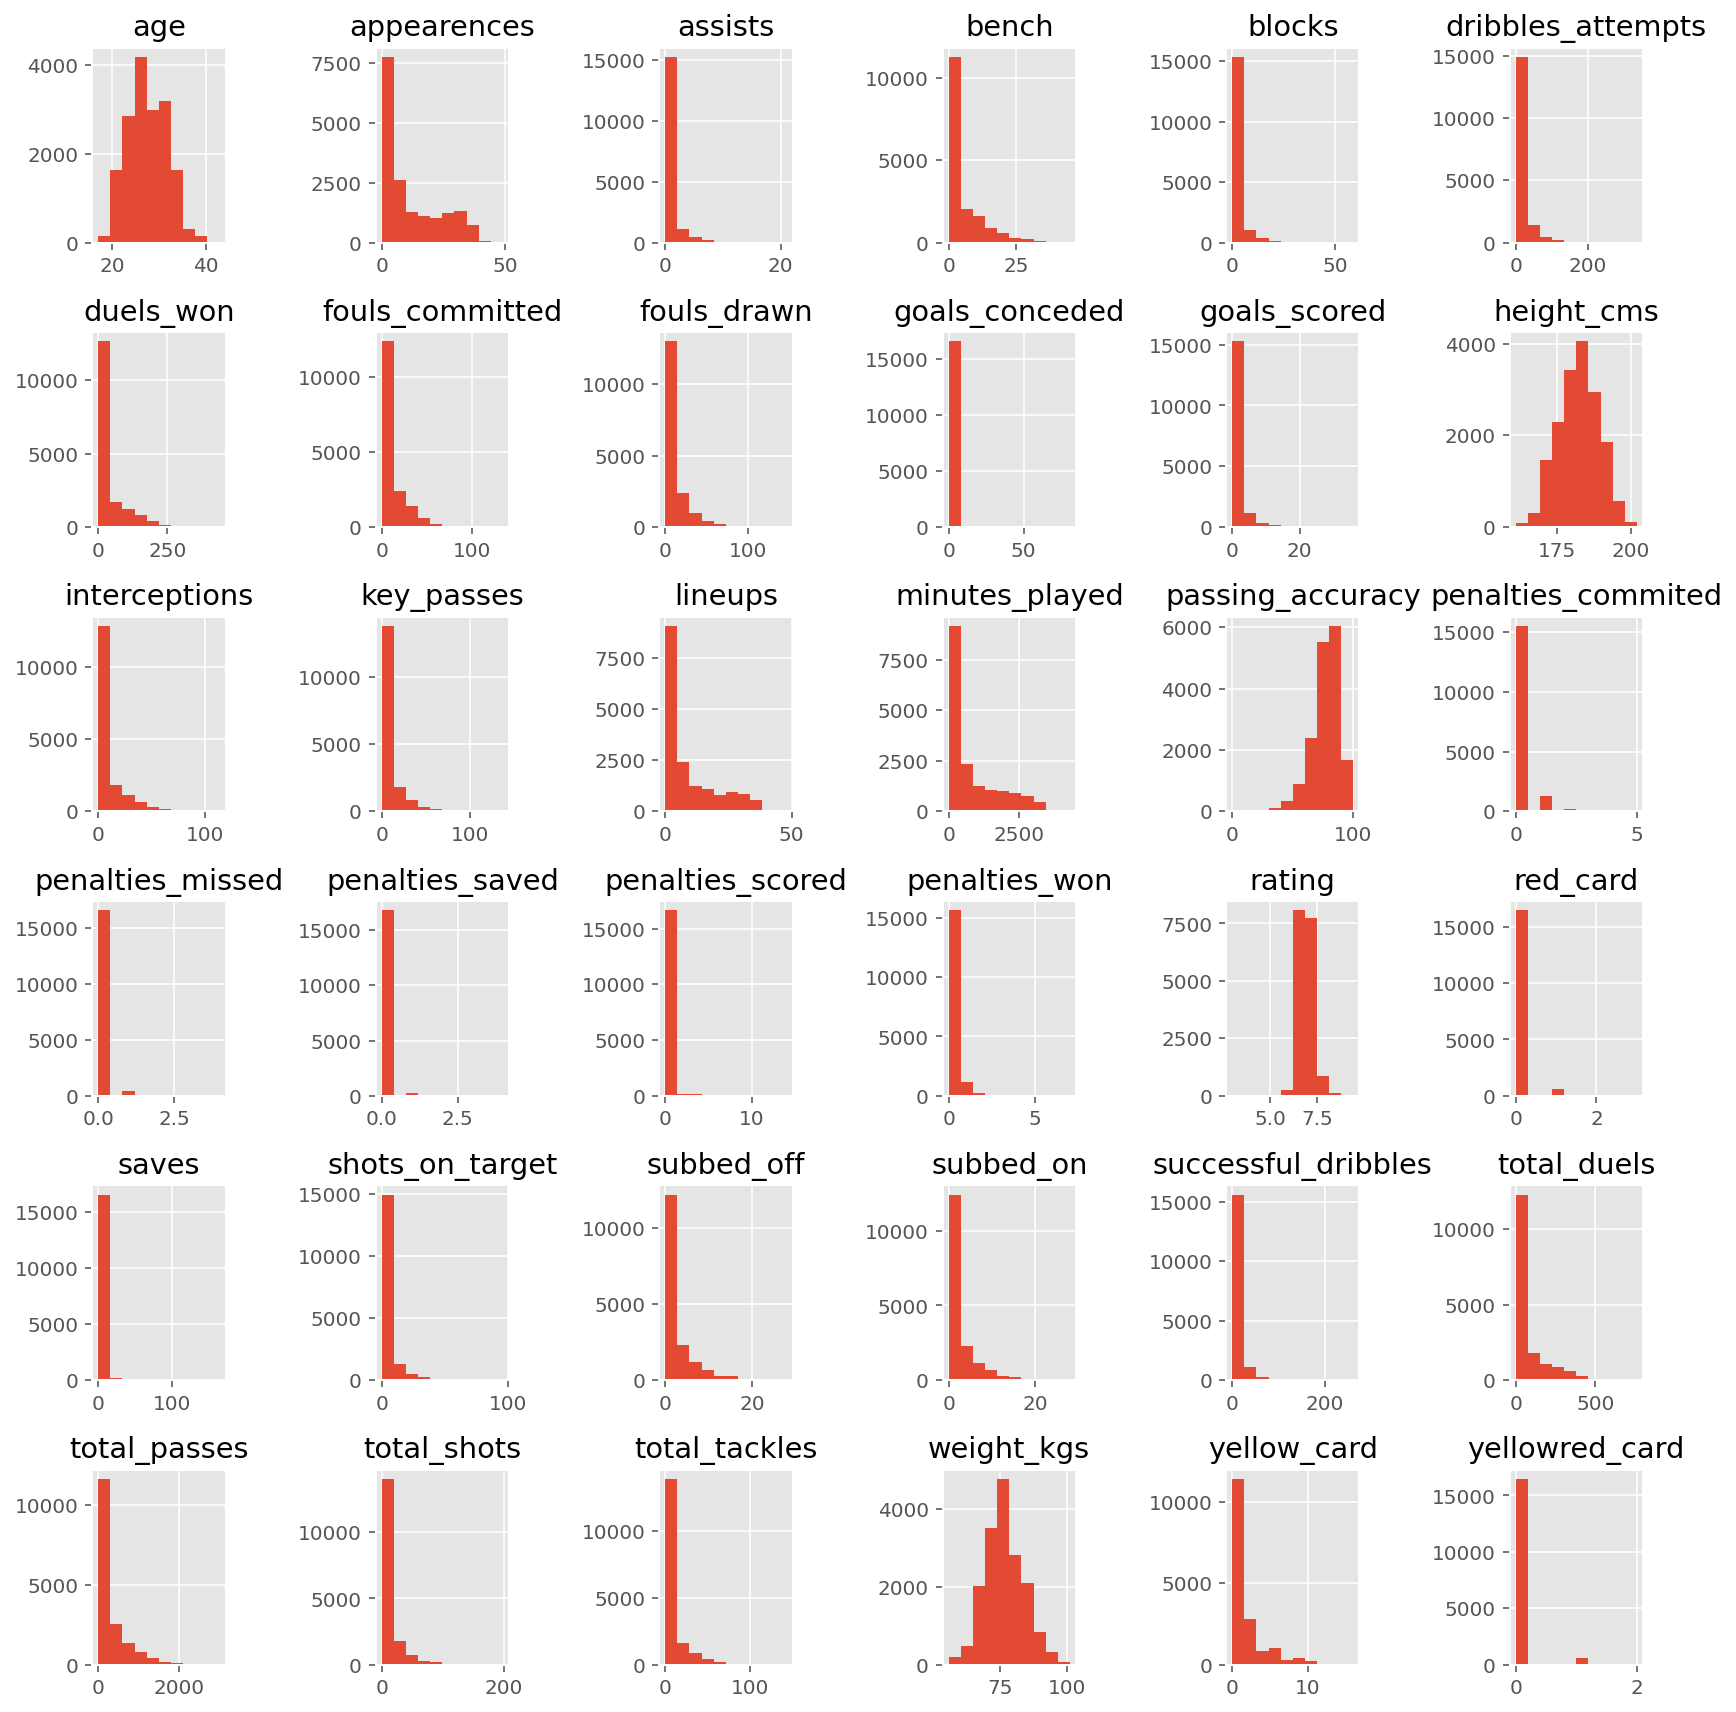

In [134]:
ls.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

In [2]:
#Due to the amount of variables viewing the full pairplot is quite complicated
#and hard to read. If we still want to have a look we can use the below code.

#sns.pairplot(ls)
#plt.show()

# Correlations

In [13]:
#correlation matrix
corrmat = ls.corr()

In [14]:
def correlation_heat_map(df):
    corrmat = df.corr()
    
    fig, ax = plt.subplots(figsize=(75, 35))
    
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    ax = sns.heatmap(corrmat, mask=mask, annot=True)
    
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=16, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=16, rotation=30)
    return fig, ax

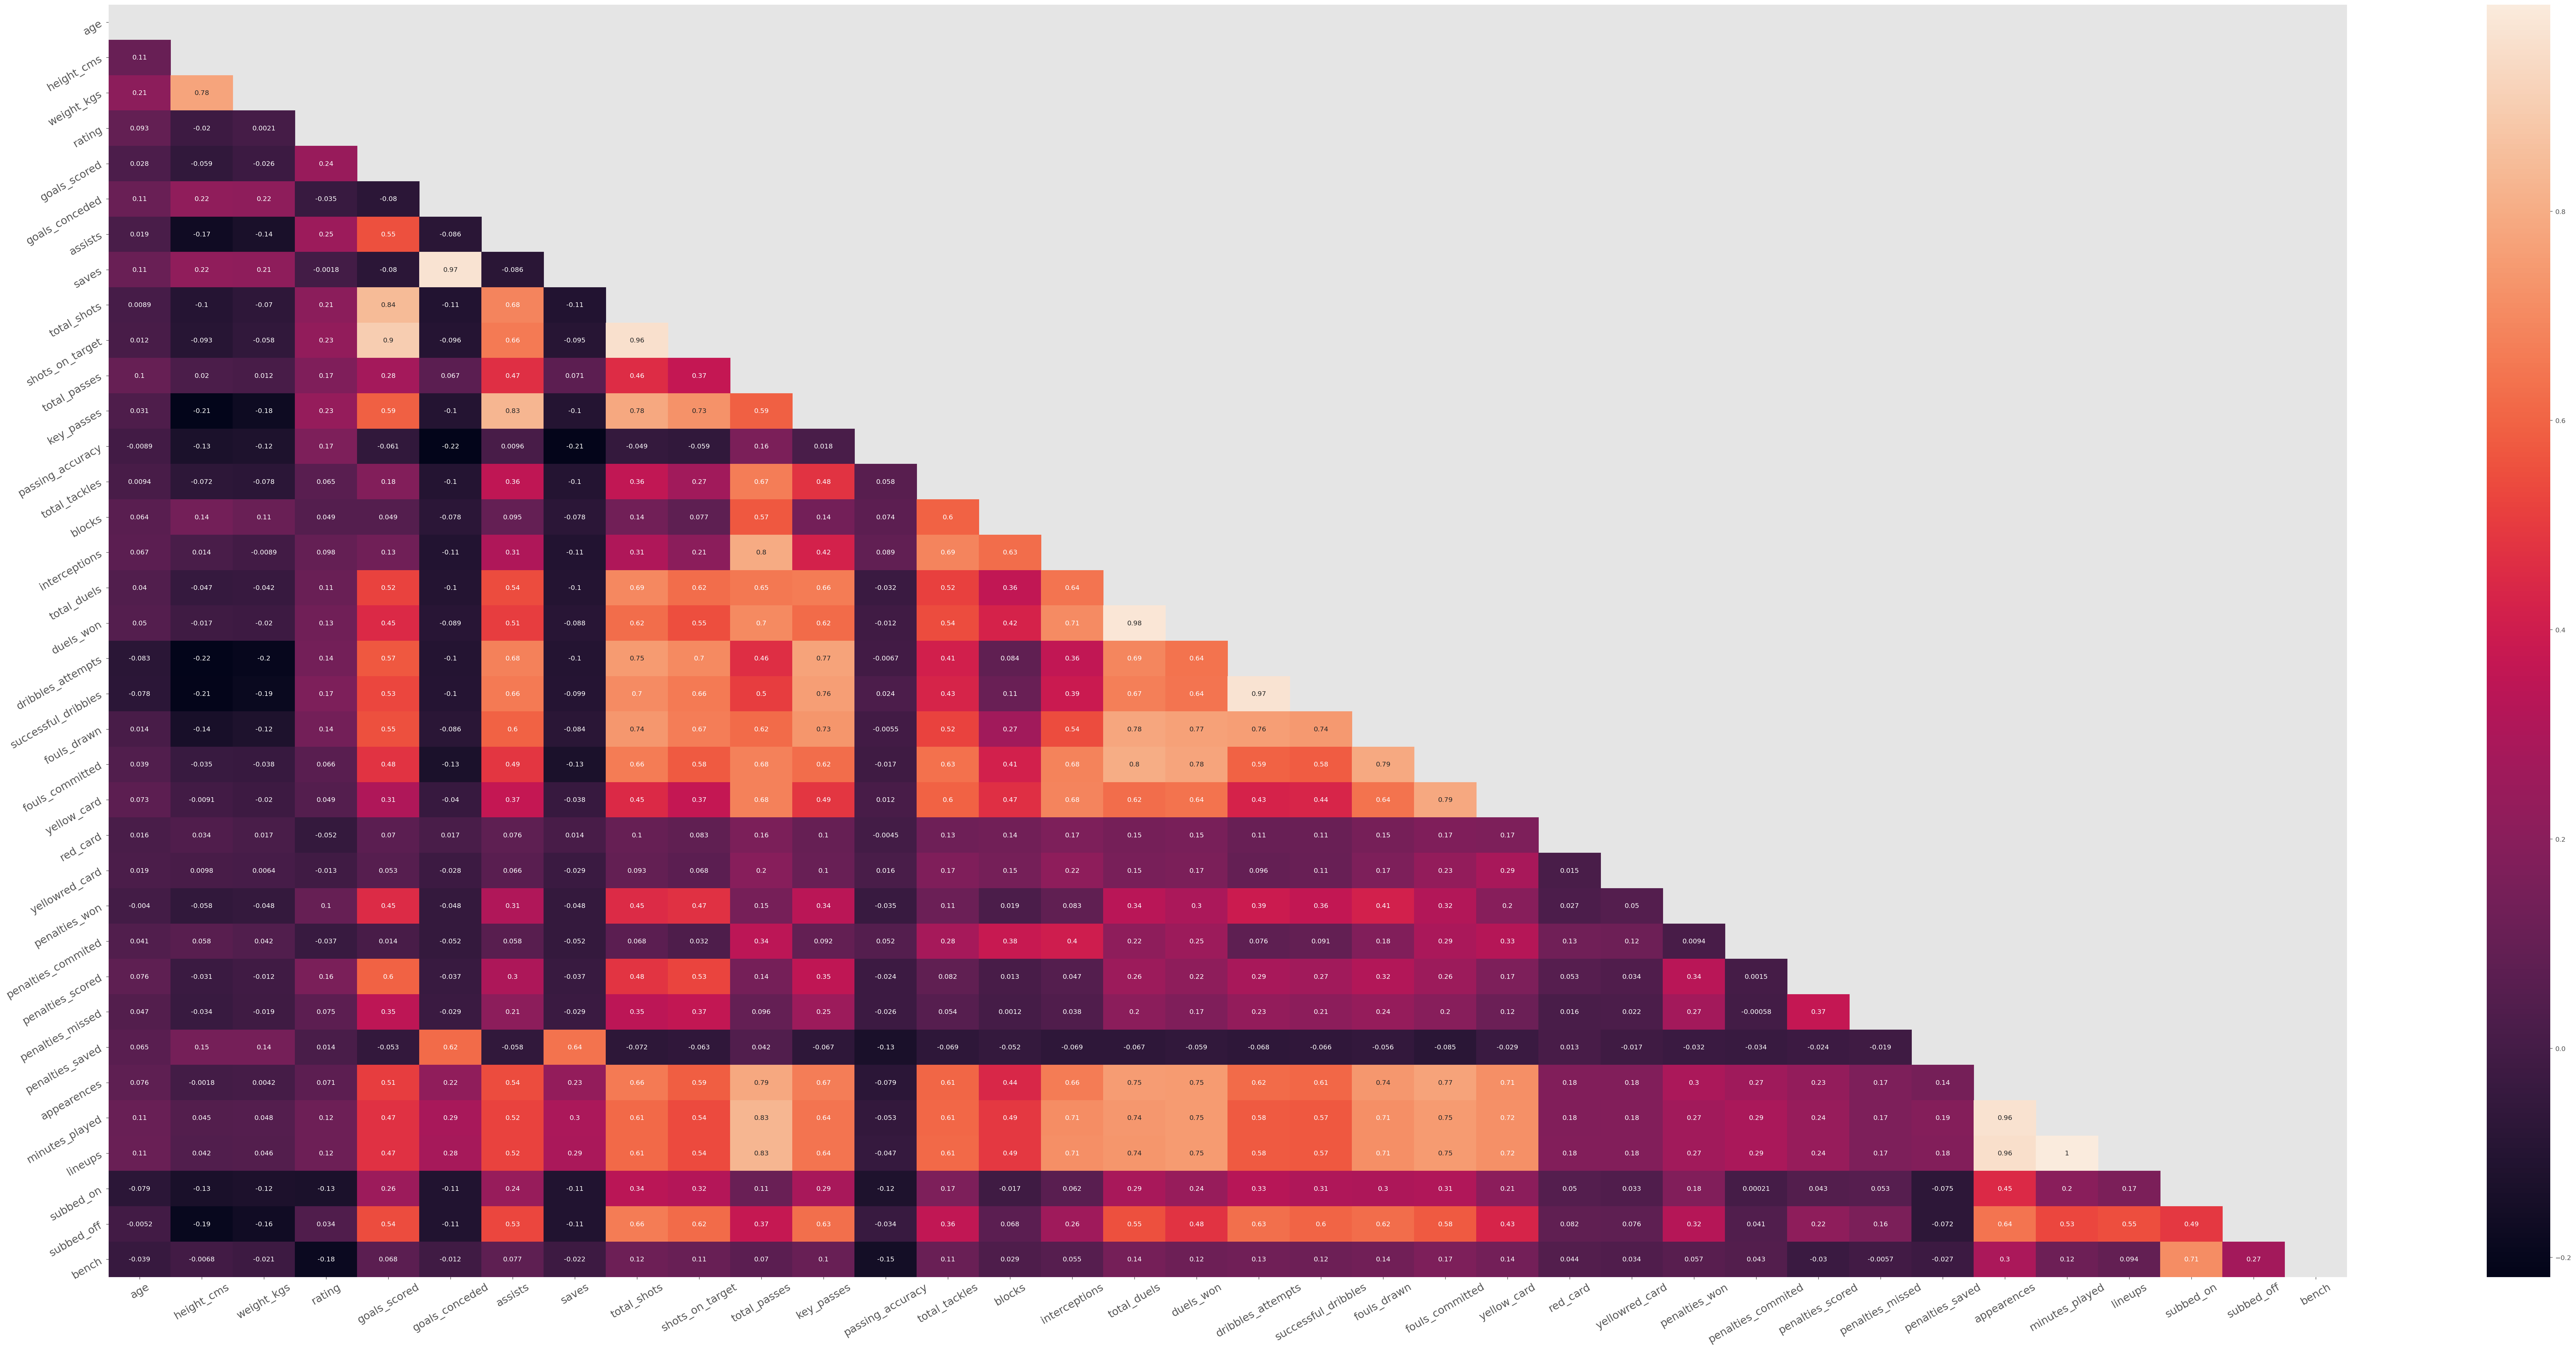

In [135]:
correlation_heat_map(ls)
plt.show()

Initially the idea was to predict only 'rating', as correlations are a little low I've decided to look into
predicting the most important stats for each position as well.

In [168]:
# Correlations for the target variables

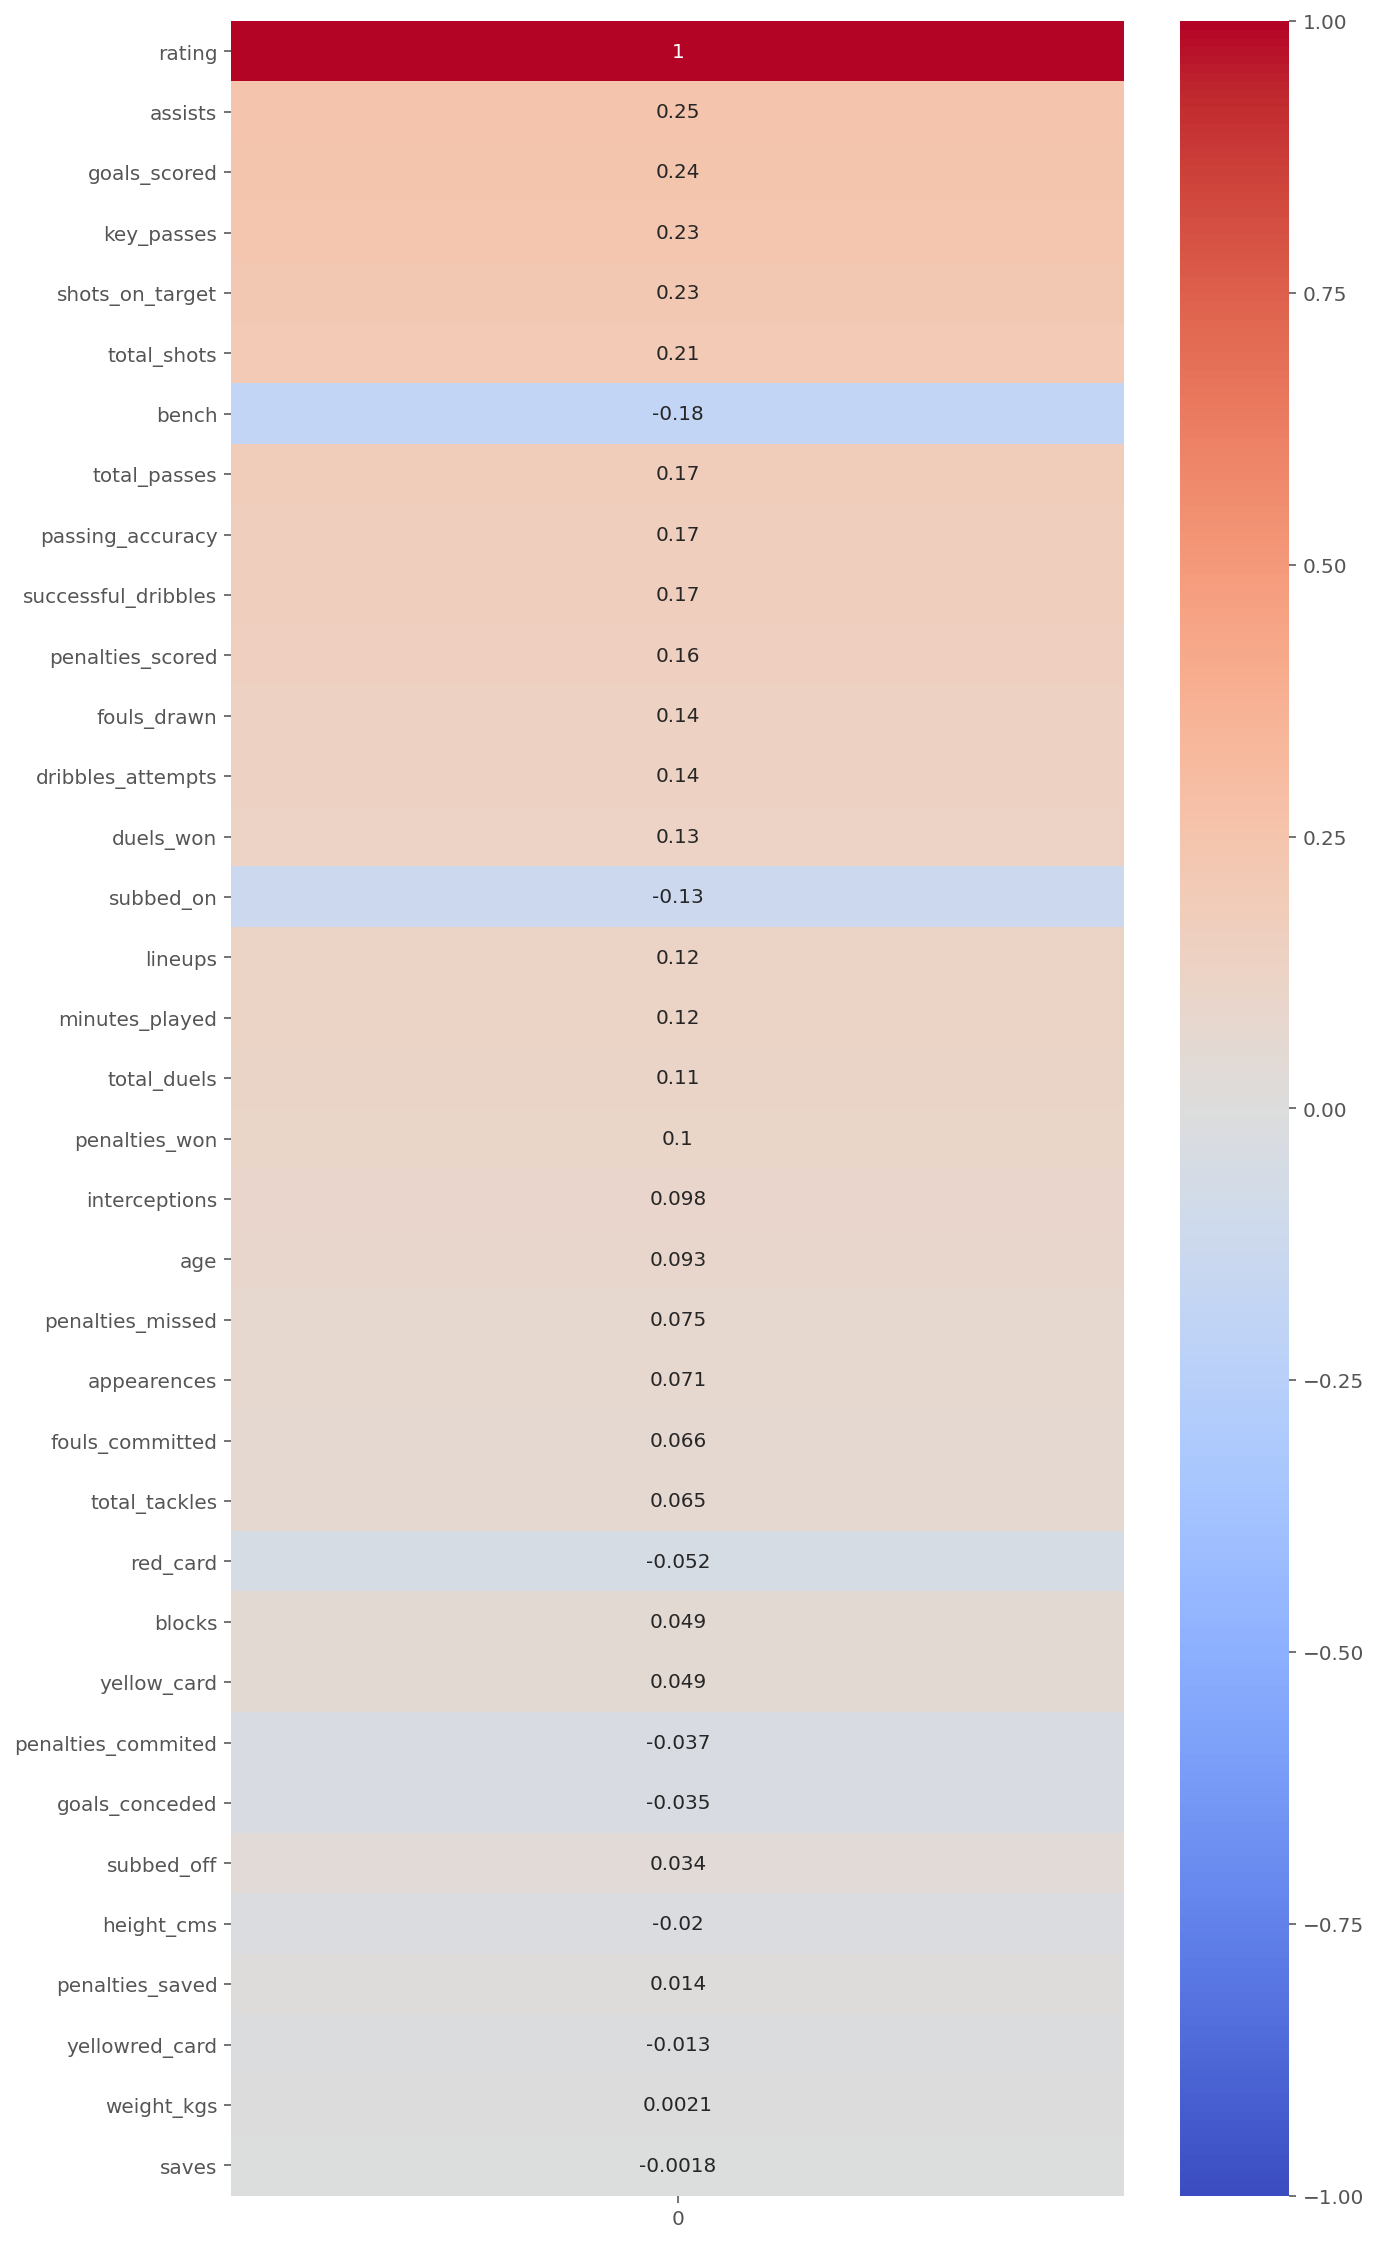

In [136]:
correlations = ls.corrwith(ls['rating']).to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

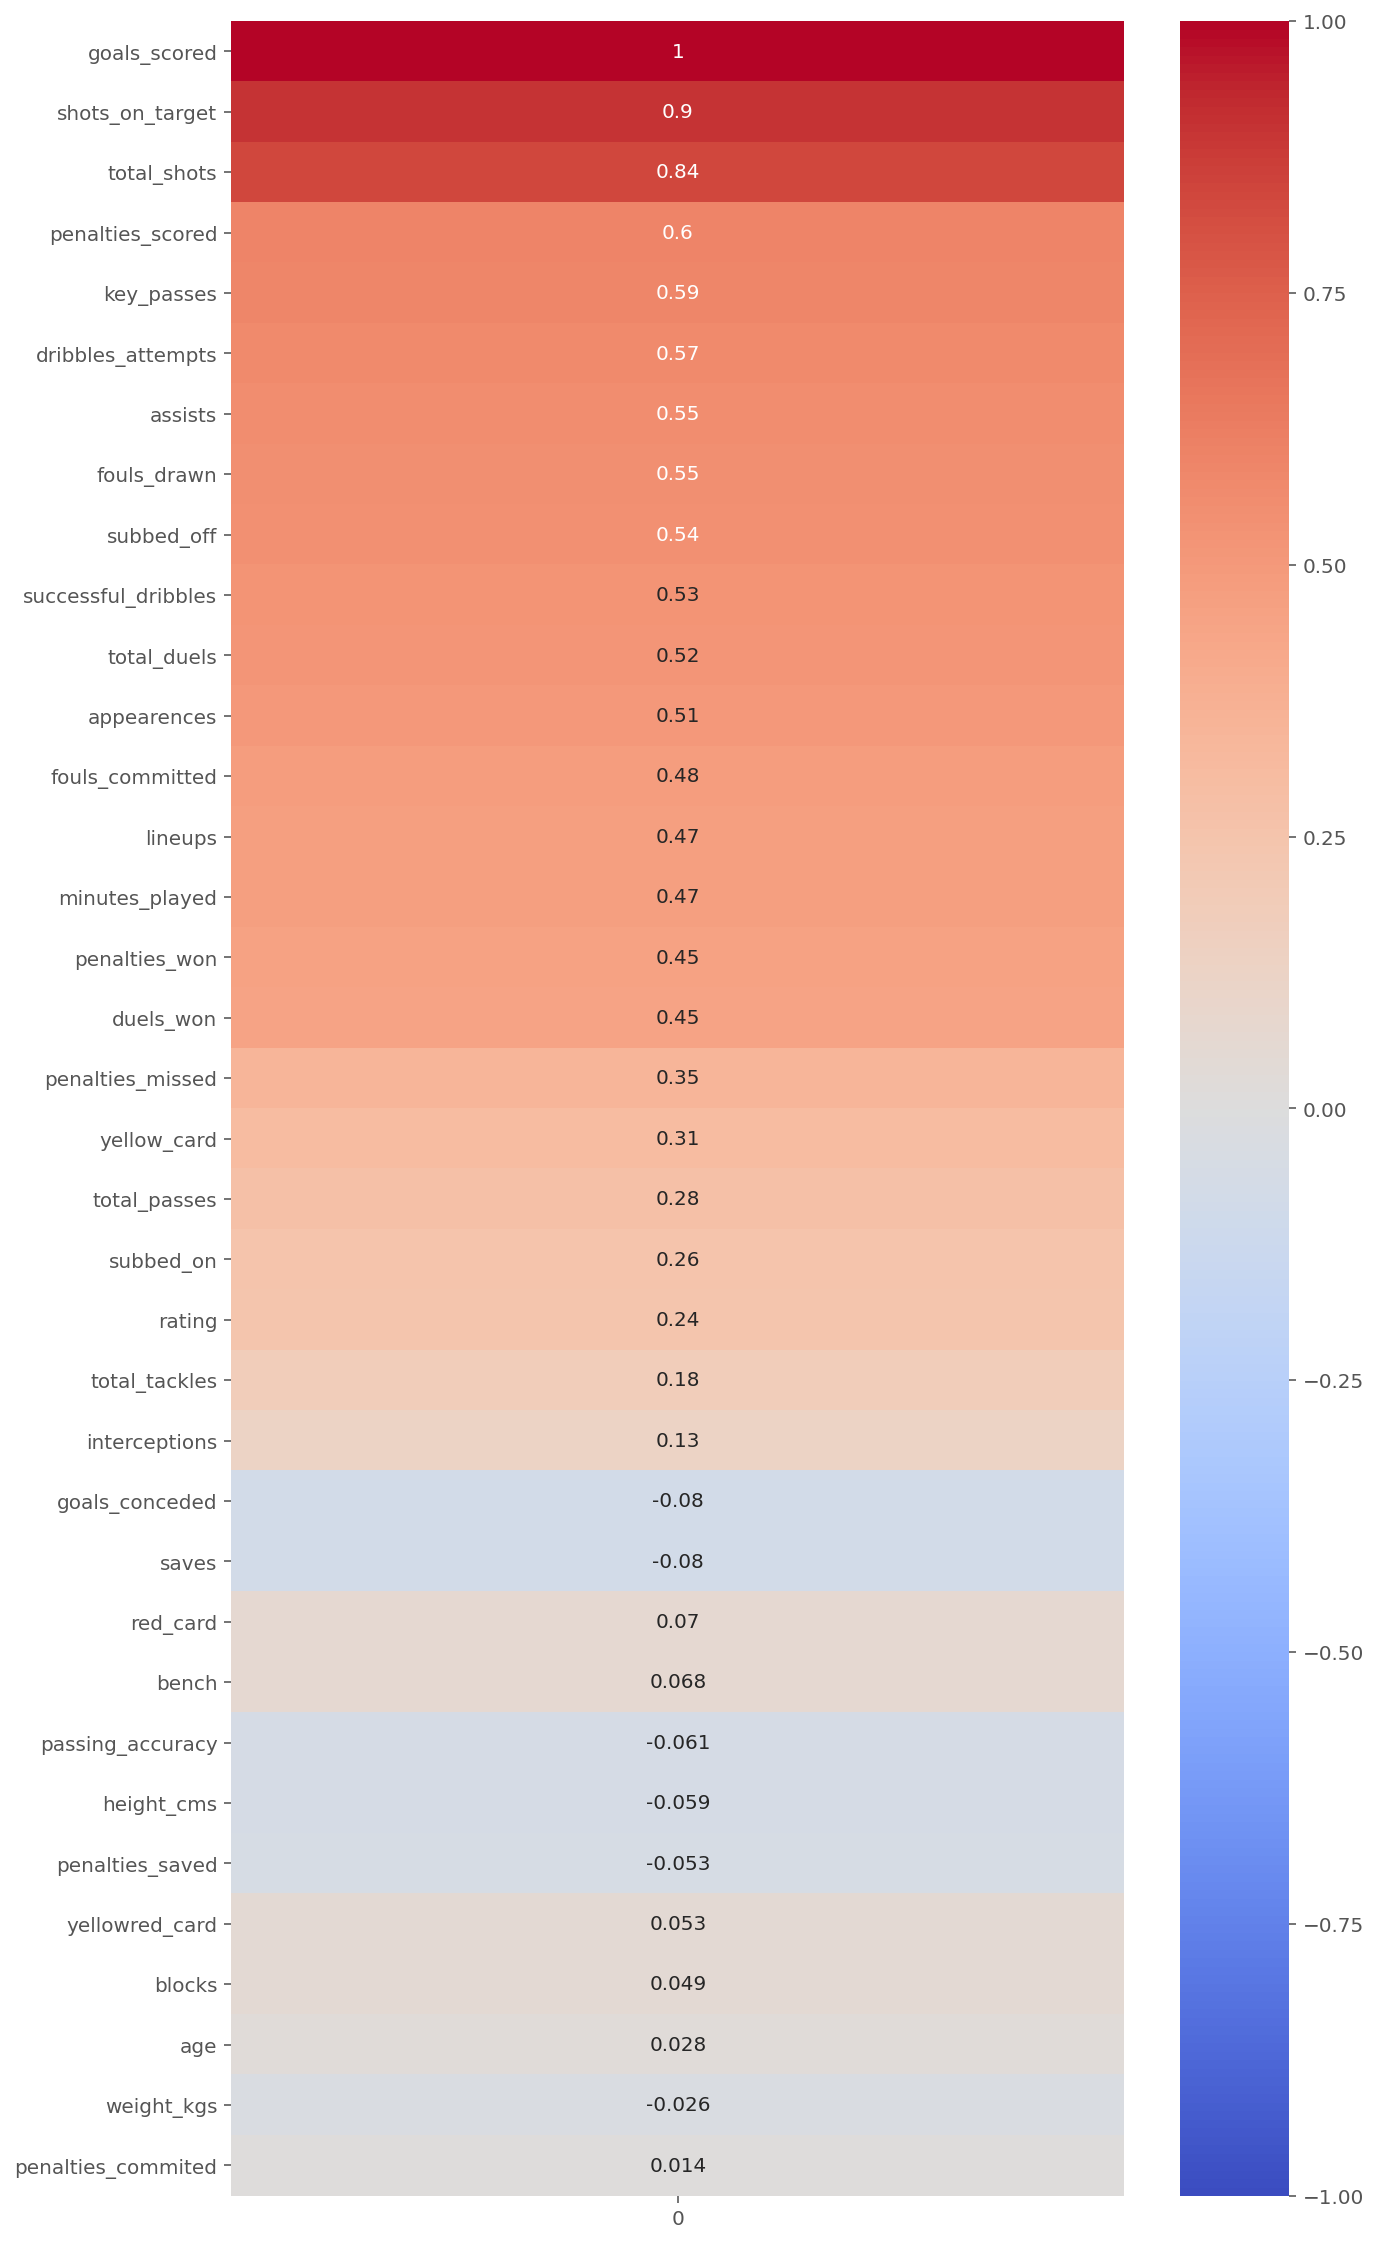

In [137]:
correlations = ls.corrwith(ls['goals_scored']).to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

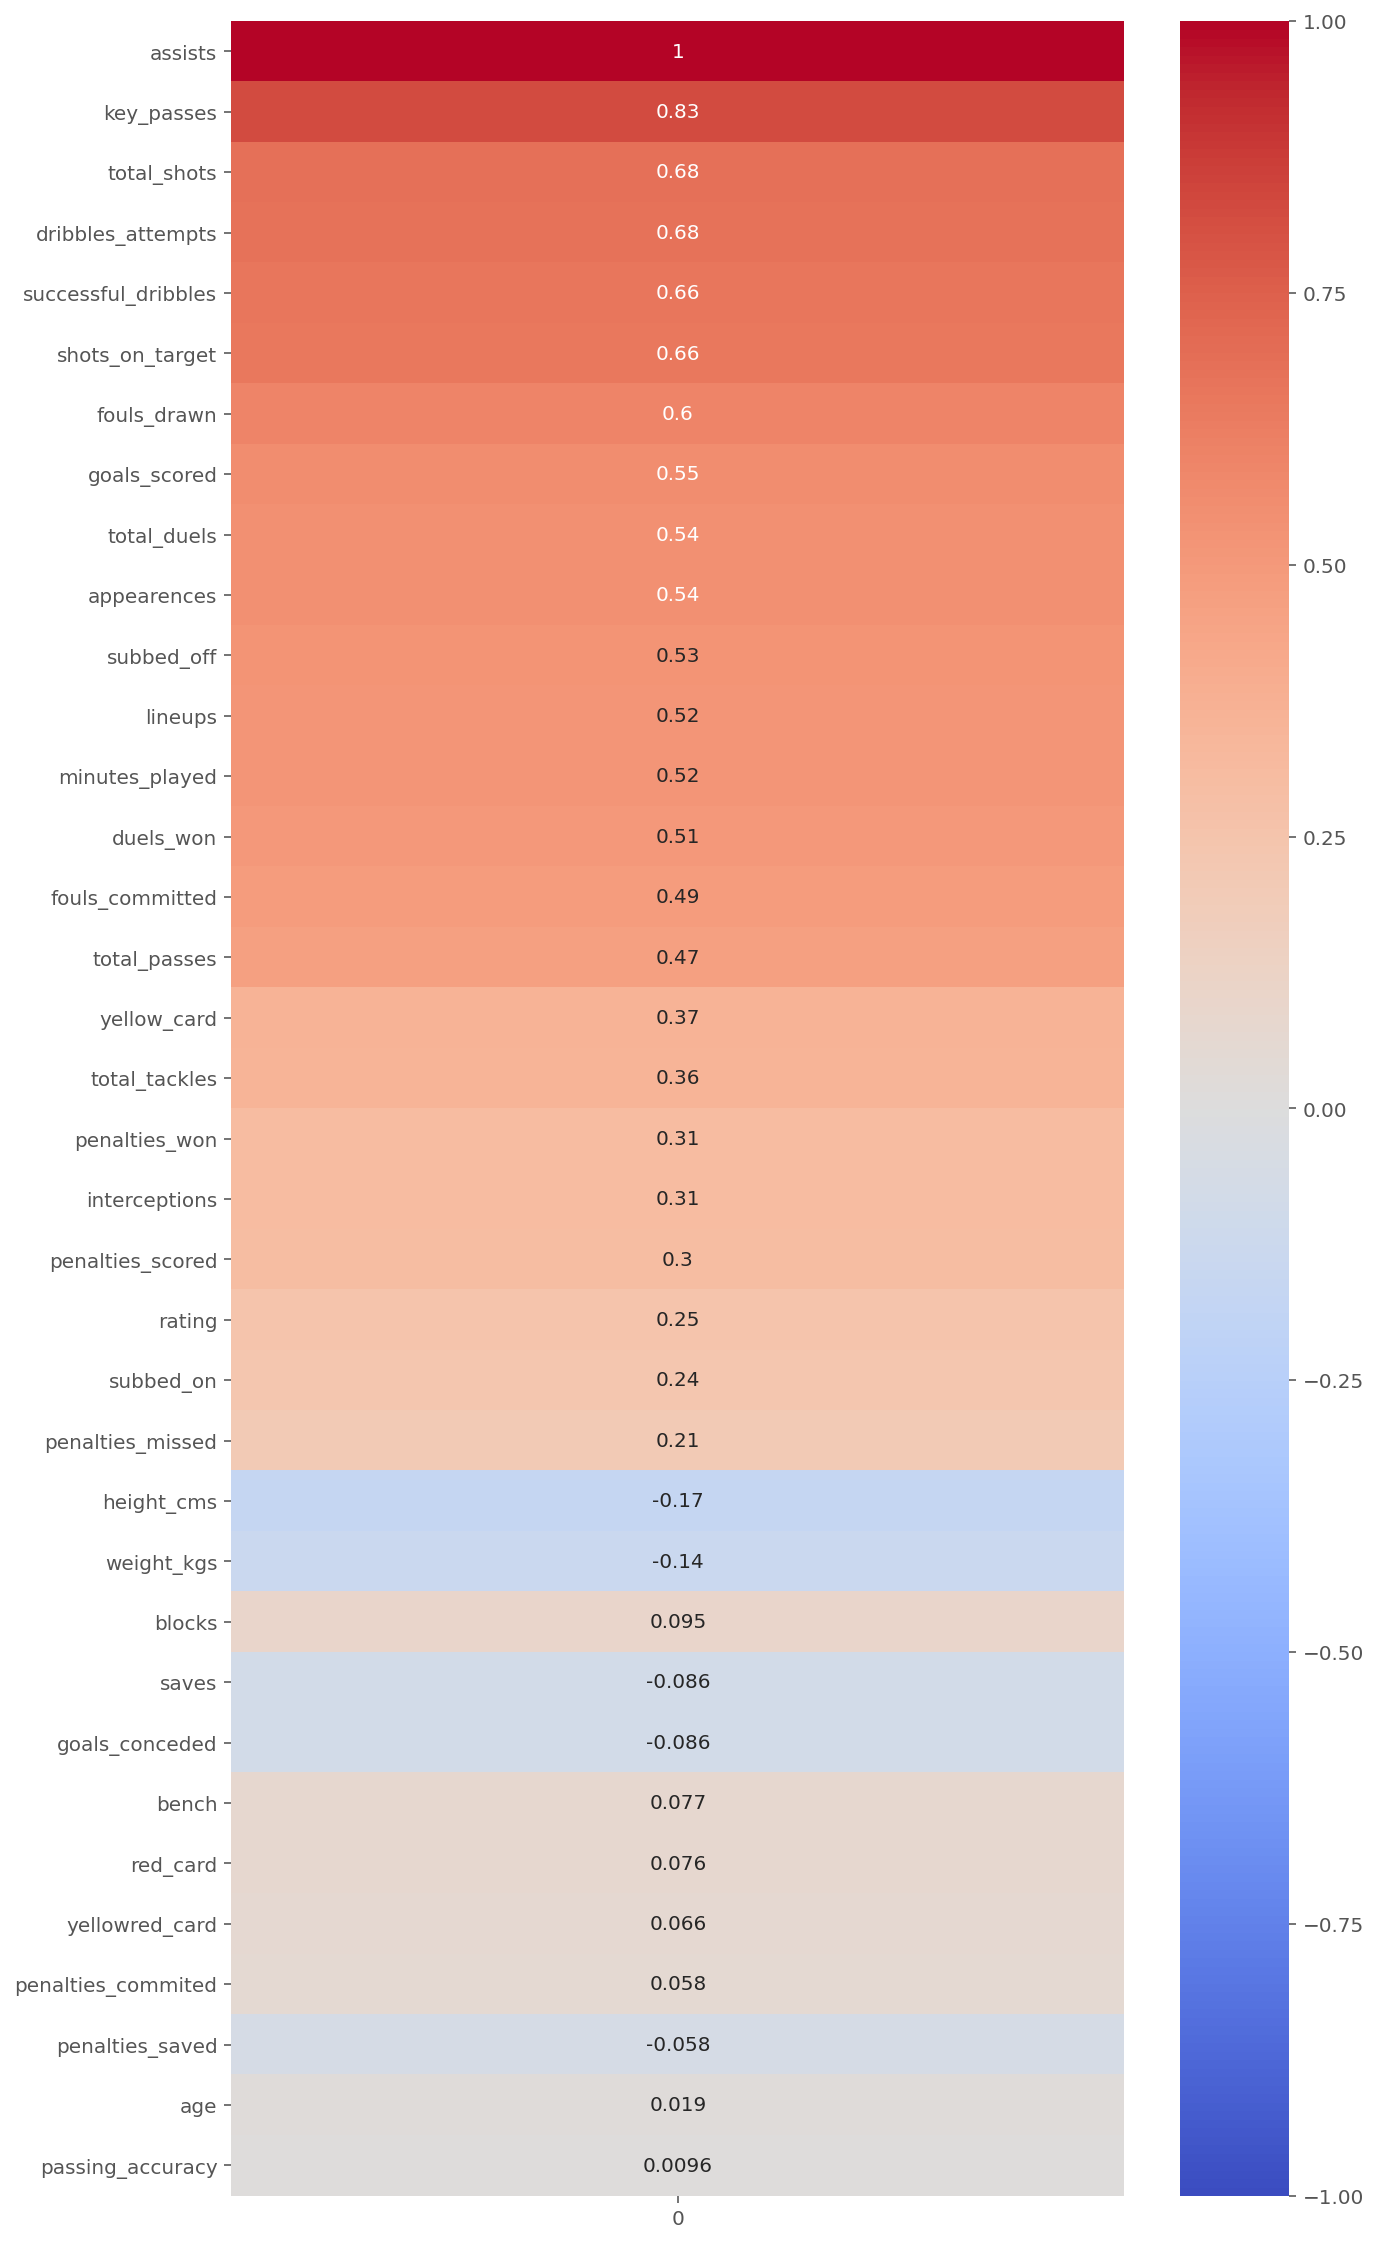

In [199]:
correlations = ls.corrwith(ls['assists']).to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

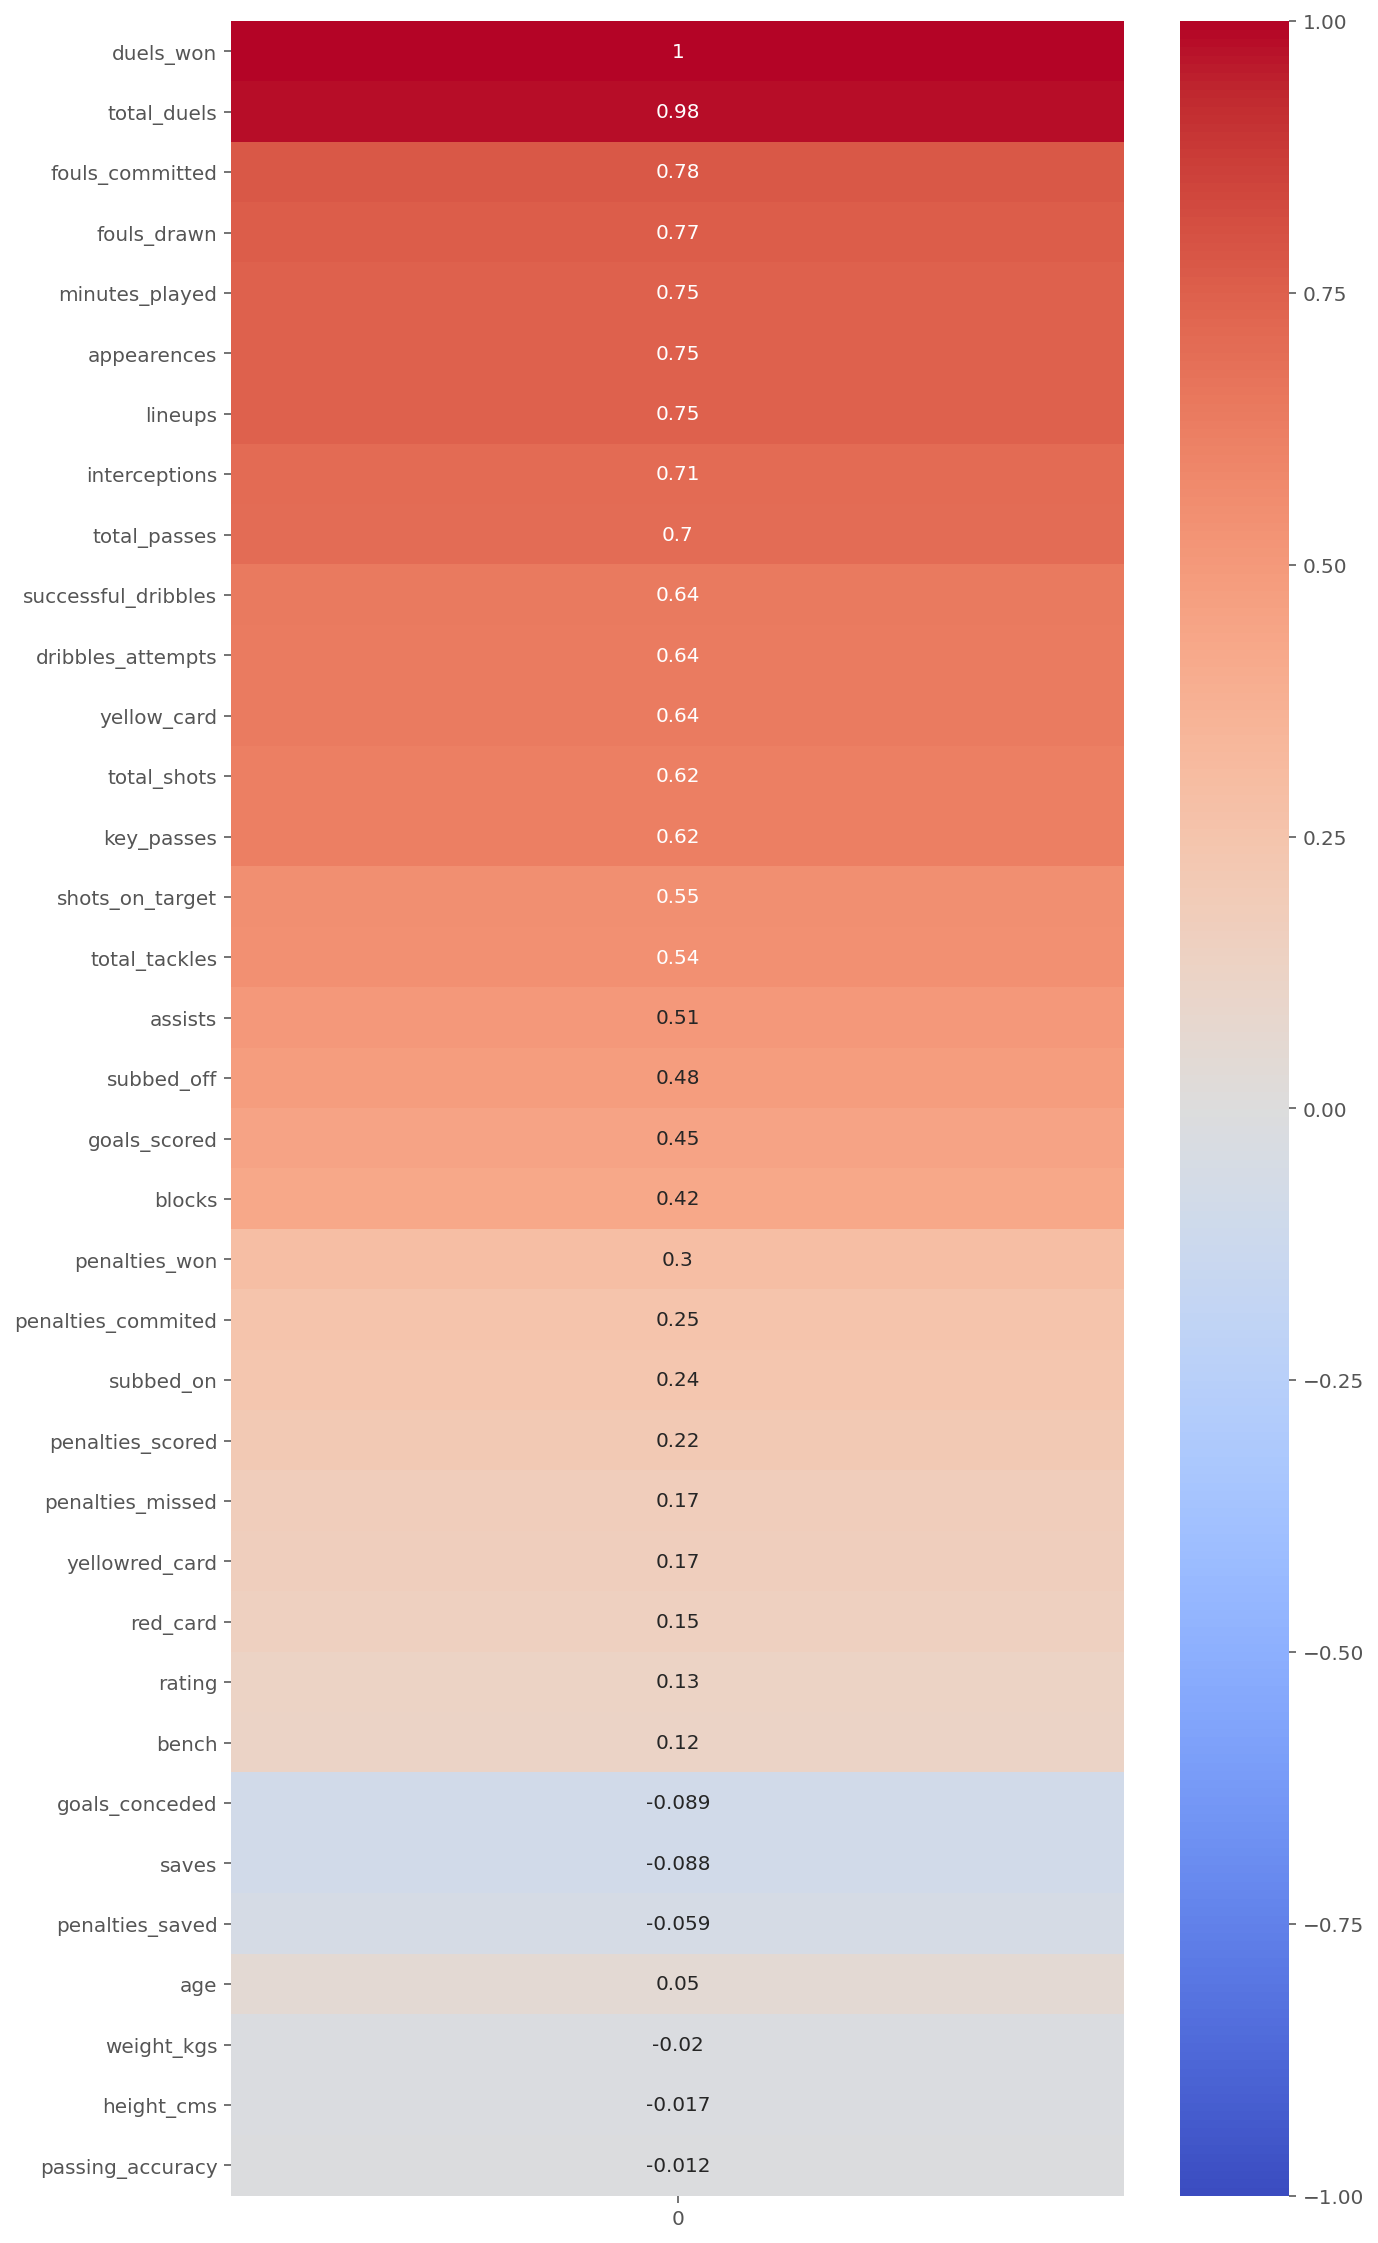

In [139]:
correlations = ls.corrwith(ls['duels_won']).to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Modeling

Models used : Linear regression, Lasso, Ridge, Elasticnet, Knn Regressor, Decision Tree Regressor ( shown below only the best results )

# Predicting Rating

In [92]:
X = ls.copy()

In [94]:
X = X[['rating', 'age', 'height_cms', 'weight_kgs', 'goals_scored', 'assists', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited', 'penalties_scored',
       'penalties_missed', 'appearences', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [95]:
y = X.pop('rating')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [97]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [79]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.2202203971361817
Cross validation score: [0.20795205 0.21667938 0.2038173  0.23730764 0.21902085]
Mean cross validation score: 0.2169554443734551
Test Score: 0.2315316922926125


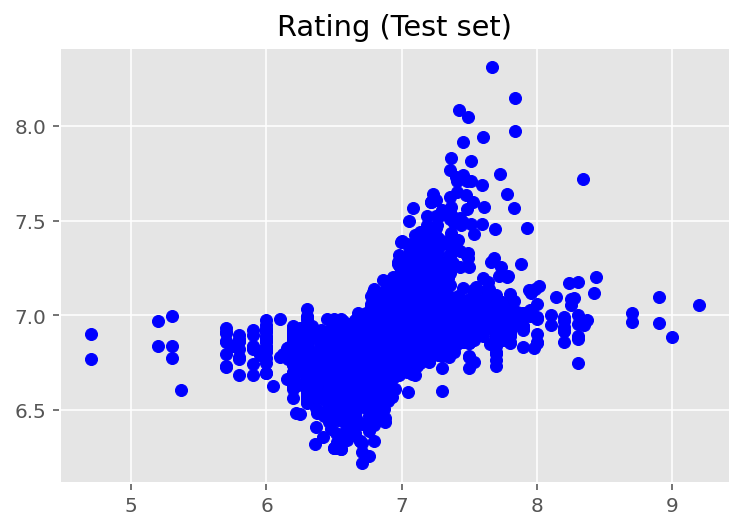

In [80]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Rating (Test set)')
plt.show()

In [81]:
# As the results are worse than expected I'll be aiming to improve them with different models.

Max depth NONE used just as comparison to analyse progress of different depths.

In [82]:
# Improving results with Decision Tree Regressor
dtr8 = DecisionTreeRegressor(max_depth=8)
dtrN = DecisionTreeRegressor(max_depth=None)
dtr8.fit(X_train, y_train)
dtrN.fit(X_train, y_train)
# cross validate the 2 models
dtr8_scores = cross_val_score(dtr8, X_train, y_train, cv=5)
dtrN_scores = cross_val_score(dtrN, X_train, y_train, cv=5)

# score the models
print(dtr8_scores, np.mean(dtr8_scores))
print(dtrN_scores, np.mean(dtrN_scores))

[0.36861967 0.36383009 0.31425645 0.3398897  0.32016425] 0.3413520315512823
[0.04081749 0.07350674 0.03590493 0.04461803 0.07167721] 0.053304879506555713


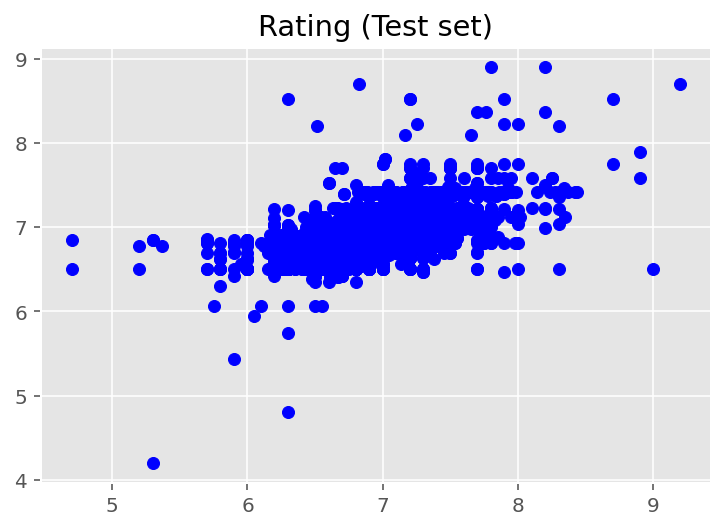

In [83]:
plt.scatter(y_test, dtr8.predict(X_test), color = 'blue')
plt.title('Rating (Test set)')
plt.show()

In [84]:
from sklearn.tree import export_graphviz
import graphviz

In [85]:
def plot_dt(dtree, feature_names=None):
    print('Max depth:', dtree.max_depth)
    dot_data = export_graphviz(dtree,
                filled=True,
                rounded=True,
                special_characters=True
                )

    graph = graphviz.Source(dot_data) 

    return  graph
    dot_data = StringIO()

In [86]:
# Plotting the Decision Tree

Max depth: 8


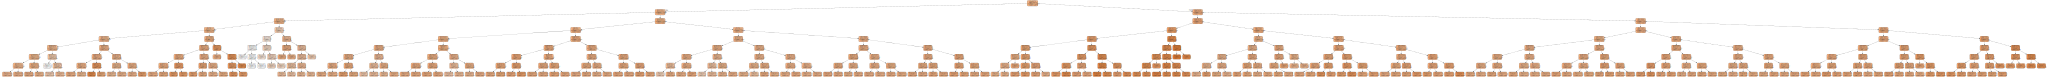

In [87]:
plot_dt(dtr8, feature_names=X.columns)

# Verifying coefficients

In [380]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [381]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients  coef_abs
minutes_played           0.527594  0.527594
lineups                 -0.324985  0.324985
total_duels             -0.322493  0.322493
duels_won                0.310894  0.310894
appearences             -0.288678  0.288678
dribbles_attempts       -0.134805  0.134805
successful_dribbles      0.116564  0.116564
goals_scored             0.101801  0.101801
key_passes               0.060385  0.060385
assists                  0.050392  0.050392

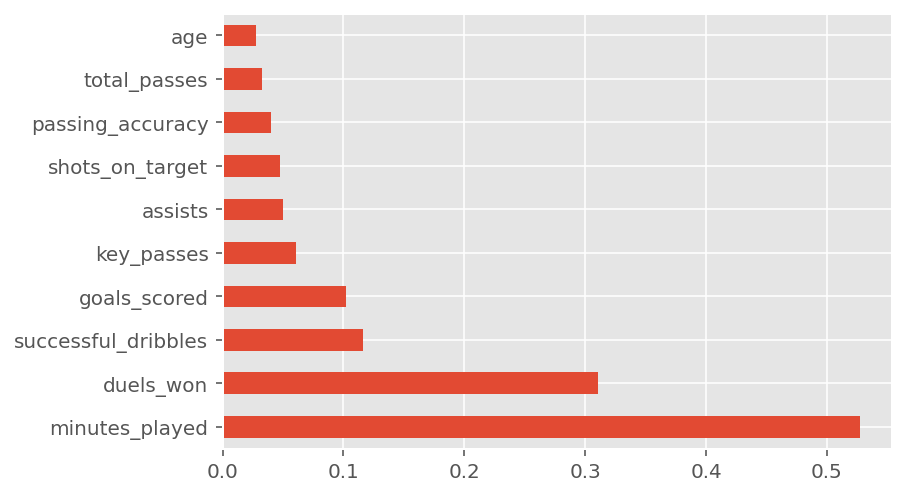

In [382]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

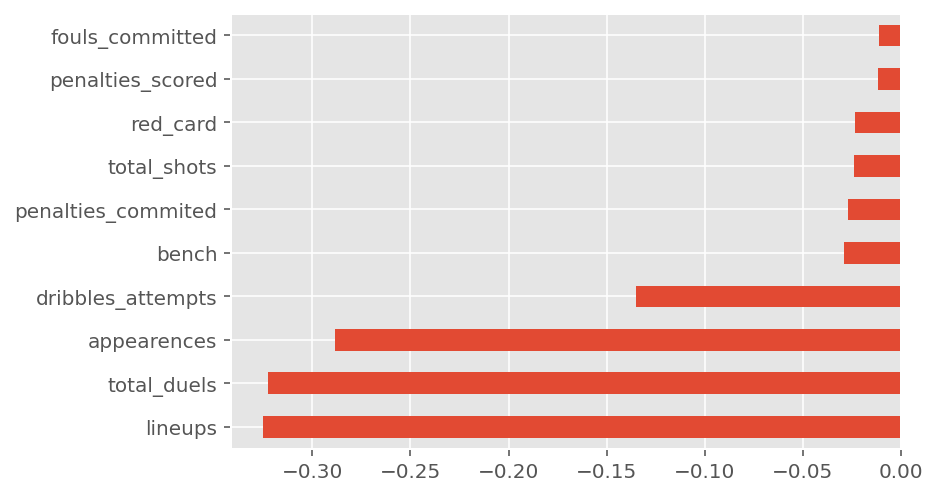

In [386]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

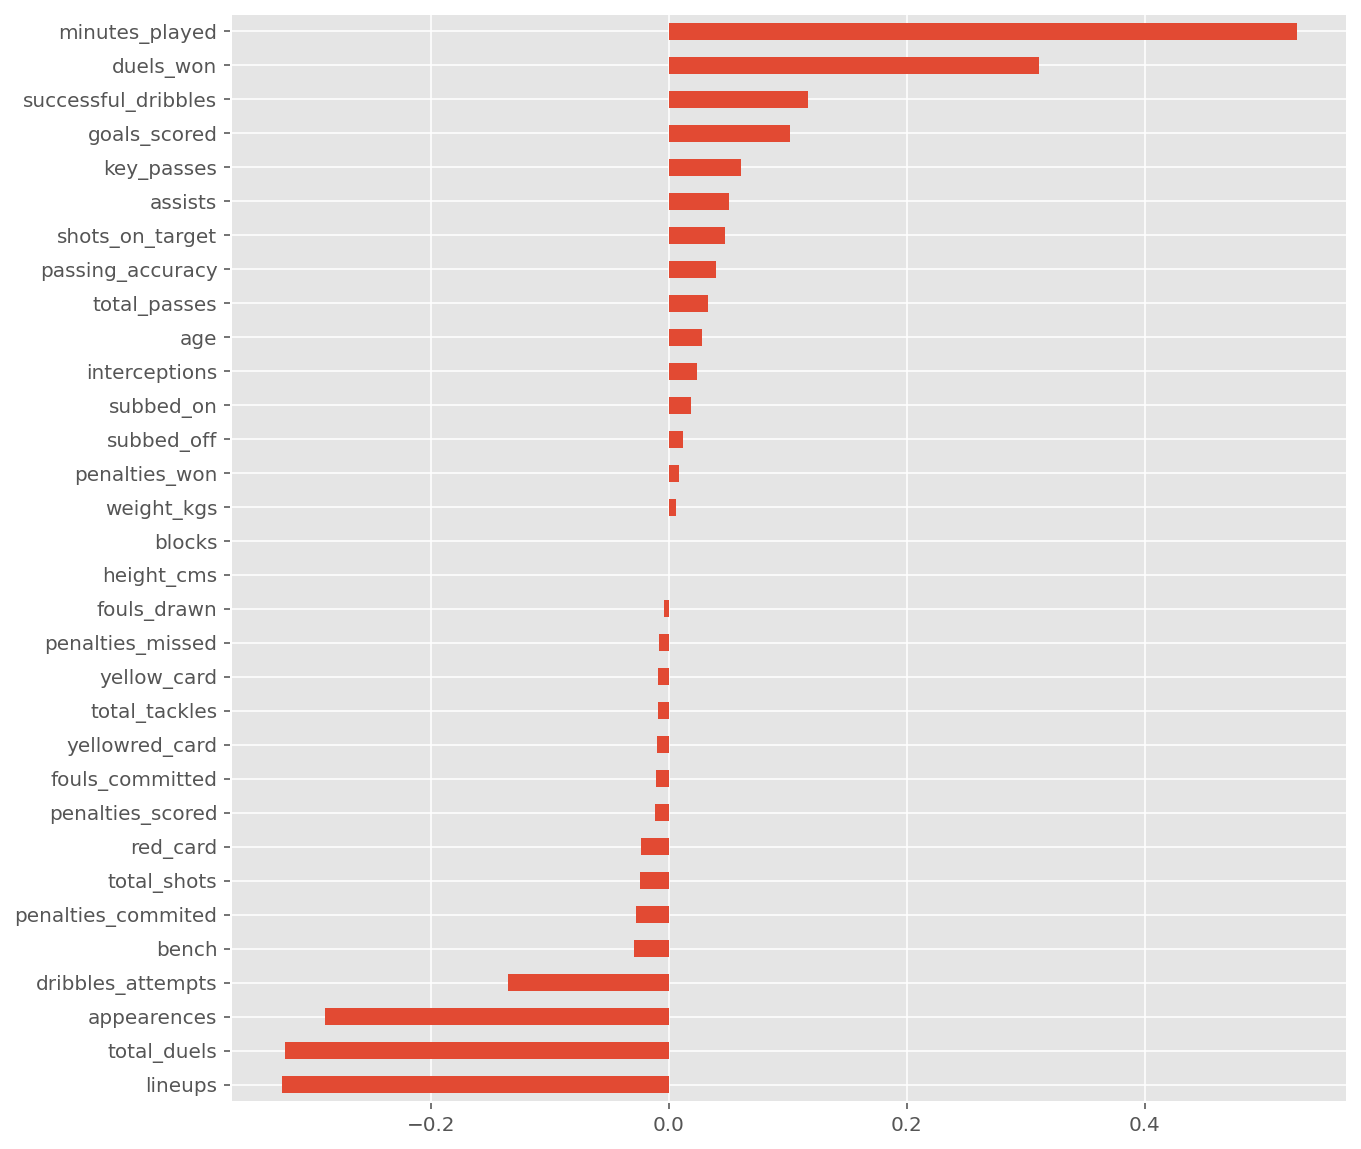

In [83]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

# Predicting goals_scored for the Attackers

In [5]:
X1 = ls[ls.position == 'Attacker'].copy()

In [6]:
y1 = X1.pop('goals_scored')

In [7]:
X1 = X1[['rating', 'age', 'height_cms', 'weight_kgs', 'assists', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited',
       'penalties_missed', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [8]:
# penalties scored not included as a predictor as they are goals scored,
# which is in this case the target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=1)

In [10]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [11]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.887186411332164
Cross validation score: [0.88467982 0.87771794 0.86644201 0.89383989 0.87567177]
Mean cross validation score: 0.8796702867855037
Test Score: 0.8728433898064103


In [12]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 100), max_iter=10000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.0041320124001153384
Cross-validated training scores: [0.88804496 0.87690352 0.86670305 0.89409966 0.87634054]
Mean cross-validated training score: 0.880418346011073
Training score: 0.887021873321782
Test Score: 0.8721348367528882


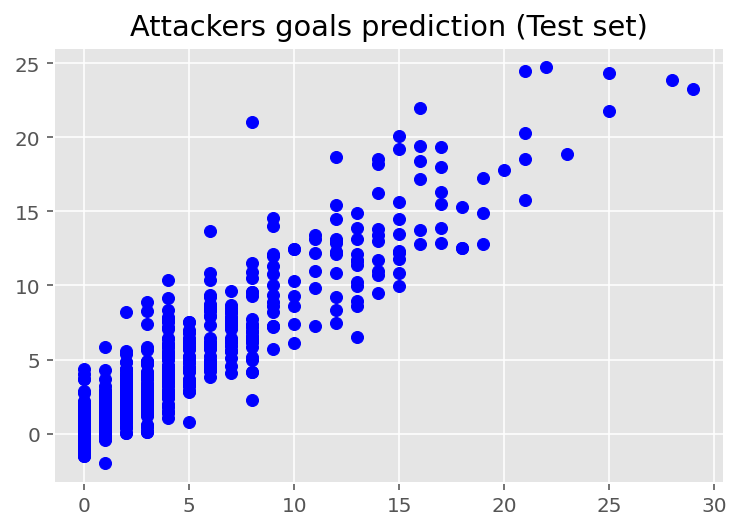

In [396]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Attackers goals prediction (Test set)')
plt.show()

# Verifying coefficients

In [402]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [403]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients  coef_abs
shots_on_target      4.766708  4.766708
minutes_played       2.195387  2.195387
total_shots         -1.092057  1.092057
key_passes          -0.779181  0.779181
lineups              0.458217  0.458217
rating               0.400626  0.400626
fouls_drawn         -0.366133  0.366133
fouls_committed     -0.328768  0.328768
interceptions       -0.310519  0.310519
subbed_off          -0.232728  0.232728

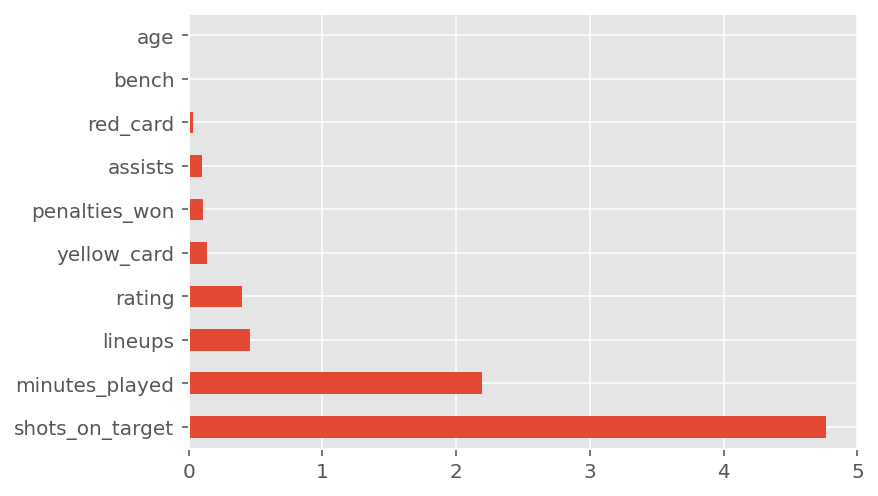

In [404]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

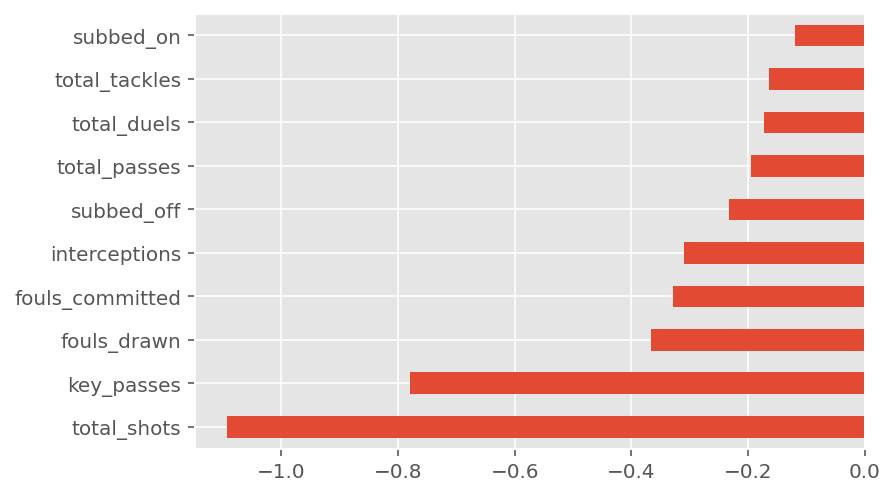

In [405]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

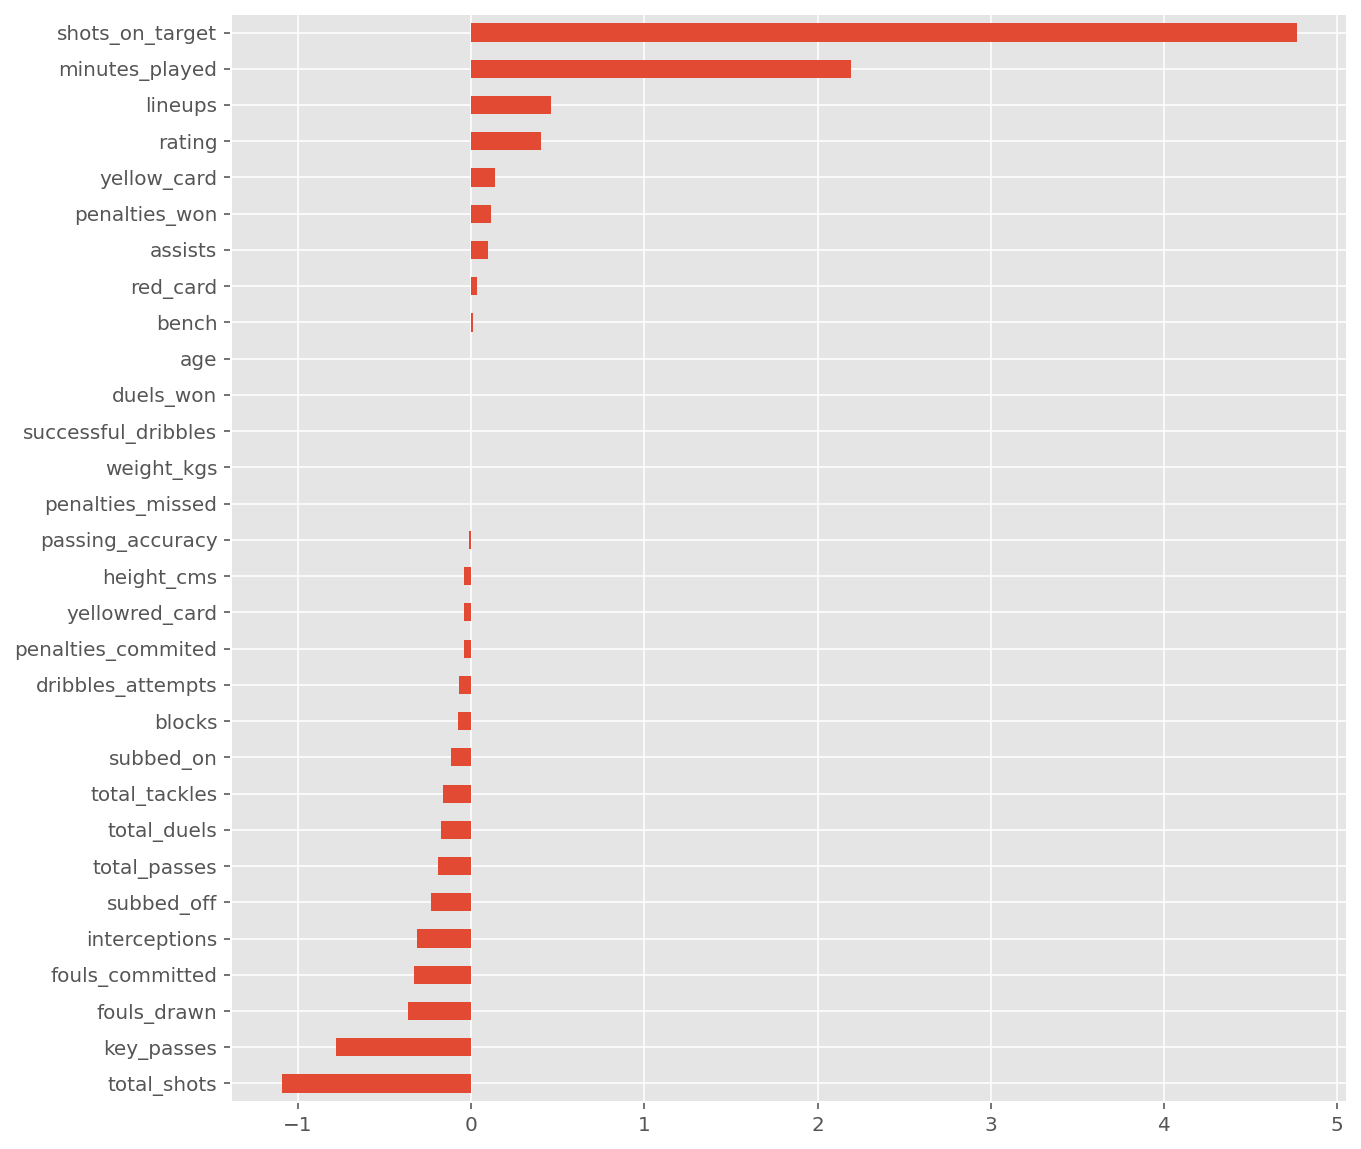

In [96]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

# Predicting duels_won for the Defenders

In [13]:
X2 = ls[ls.position == 'Defender'].copy()

In [14]:
X2 = X2[['goals_scored', 'rating','age', 'height_cms', 'weight_kgs', 'assists', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited', 'penalties_scored',
       'penalties_missed', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [15]:
y2 = X2.pop('duels_won')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=1)

In [17]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [18]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9898985791673942
Cross validation score: [0.99026034 0.9892697  0.98989366 0.98724403 0.99089405]
Mean cross validation score: 0.9895123559099694
Test Score: 0.9898814472493874


In [23]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-5, 5, 100), max_iter=100000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.00041320124001153346


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43338.71245269544, tolerance: 1069.0894540145987
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40248.81846511491, tolerance: 1062.6374553576645
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40114.55431608626, tolerance: 1045.5225532107413
  model = cd_fast.enet_coordinate_descent(


Cross-validated training scores: [0.99026871 0.98926753 0.98988053 0.98722047 0.99091526]
Mean cross-validated training score: 0.989510499092819
Training score: 0.9898938186831282
Test Score: 0.9898683684066514


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36814.526932314024, tolerance: 1091.2394352889664
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46179.948610249936, tolerance: 1097.3027971978988
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52234.47997468026, tolerance: 1341.4634569827183
  model = cd_fast.enet_coordinate_descent(


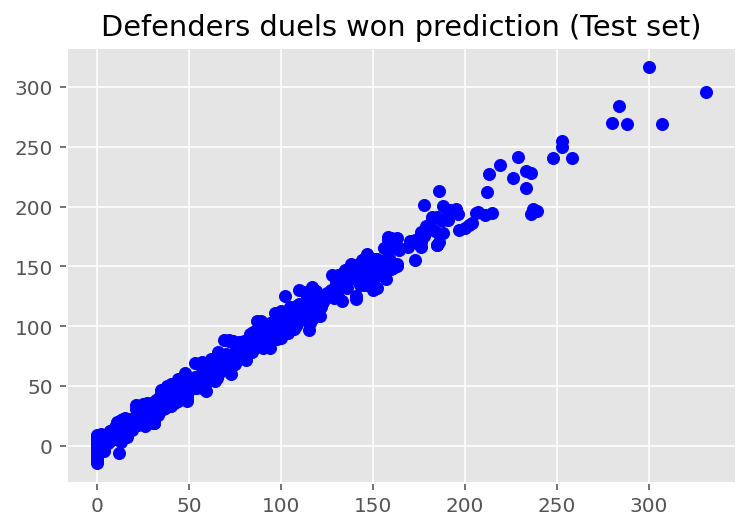

In [498]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Defenders duels won prediction (Test set)')
plt.show()

# Verifying coefficients

In [499]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [500]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients   coef_abs
total_duels             55.866707  55.866707
dribbles_attempts      -11.449377  11.449377
successful_dribbles      9.757879   9.757879
fouls_committed         -5.028617   5.028617
lineups                  4.977676   4.977676
minutes_played          -4.064348   4.064348
fouls_drawn              3.243217   3.243217
key_passes              -1.766109   1.766109
interceptions            1.356735   1.356735
total_tackles            0.803642   0.803642

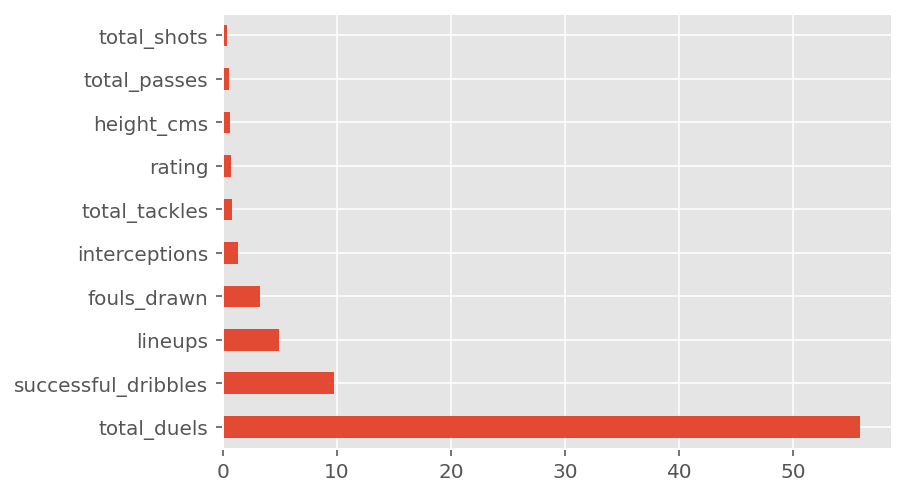

In [501]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

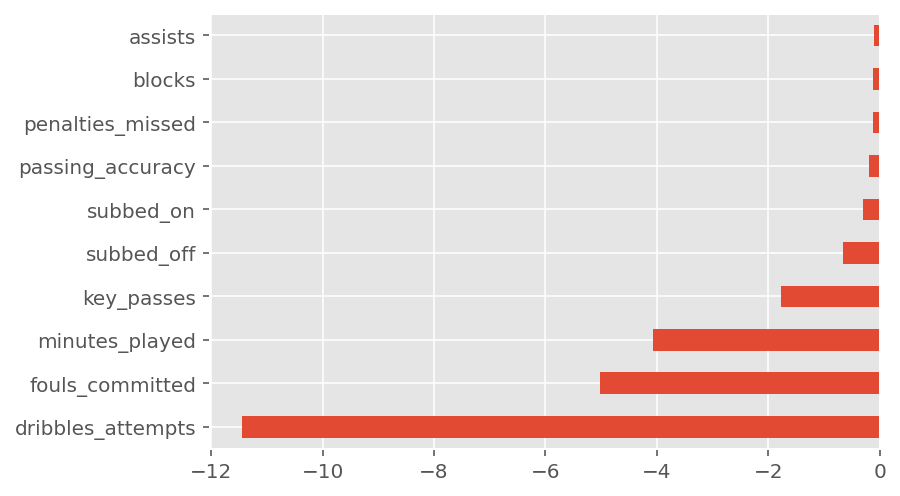

In [515]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

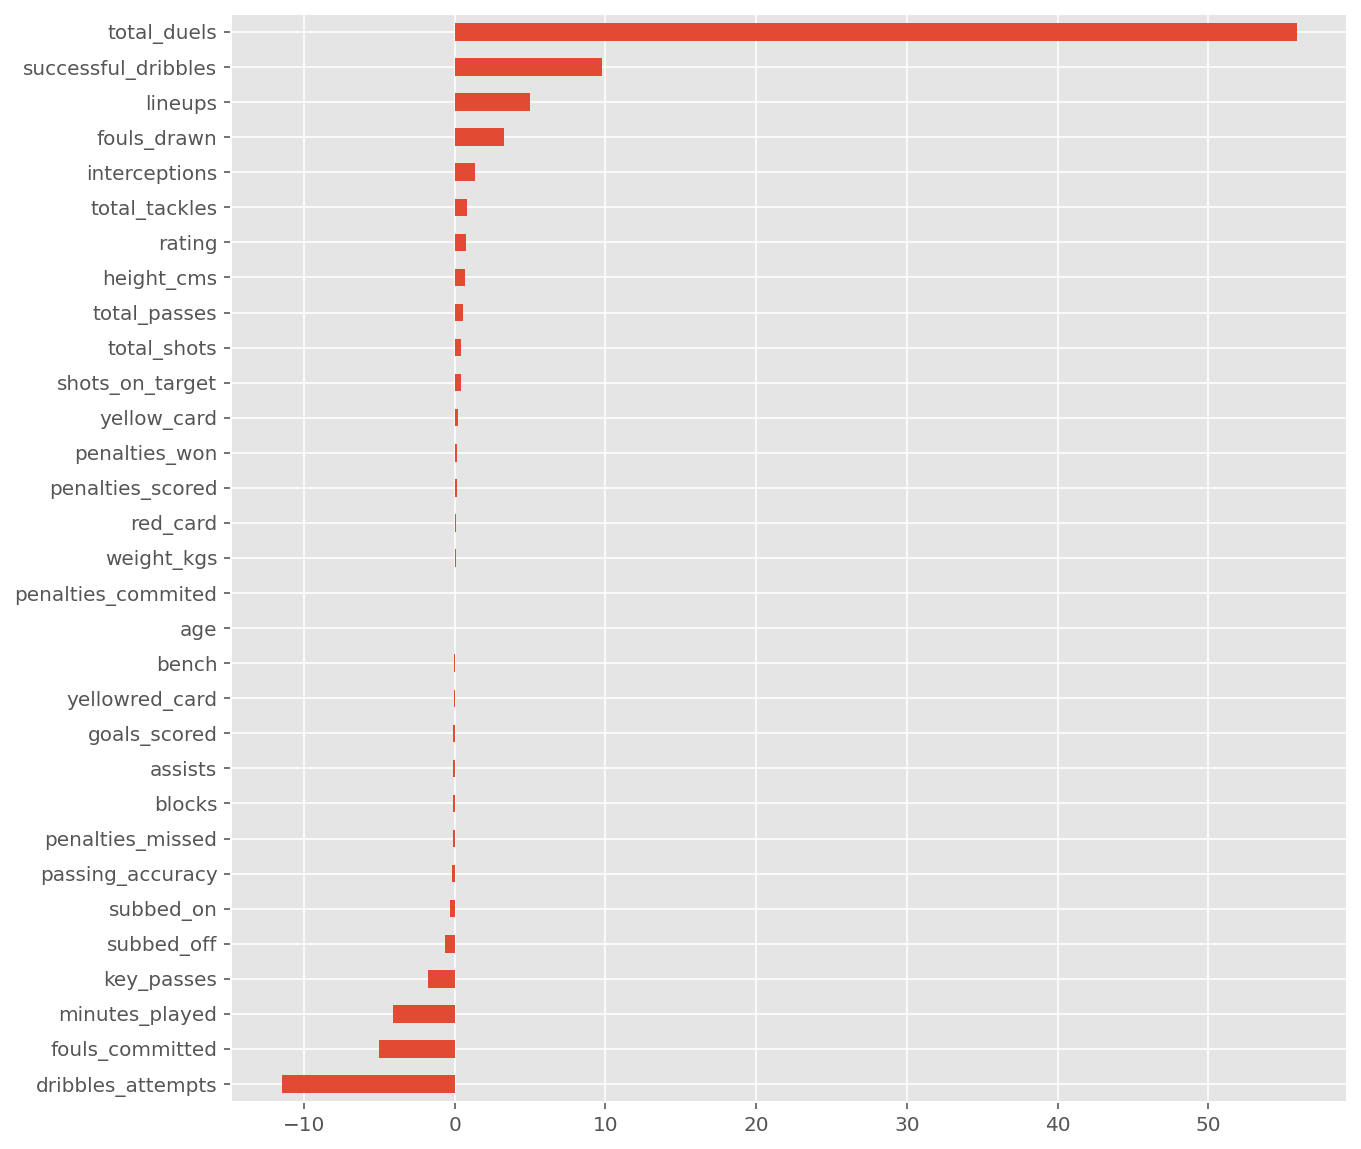

In [516]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

In [ ]:
# results for duels_won without highly correlated total_duels

In [8]:
X2 = X2[['goals_scored', 'rating','age', 'height_cms', 'weight_kgs', 'assists', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited', 'penalties_scored',
       'penalties_missed', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [9]:
y2 = X2.pop('duels_won')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-5, 5, 100), max_iter=10000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.1747528400007683
Cross-validated training scores: [0.75413192 0.75400641 0.74256973 0.74970579 0.71493059]
Mean cross-validated training score: 0.7430688883066259
Training score: 0.7517012074432003
Test Score: 0.7582791575088458


# Predicting assists for the Midfielders

In [427]:
X3 = ls[ls.position == 'Midfielder'].copy()

In [428]:
y3 = X3.pop('assists')

In [429]:
X3 = X3[['goals_scored', 'rating','age', 'height_cms', 'weight_kgs', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited', 'penalties_scored',
       'penalties_missed', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=1)

In [431]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [432]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.699723678037151
Cross validation score: [0.7199319  0.72593659 0.63945107 0.72005435 0.61399101]
Mean cross validation score: 0.6838729852556029
Test Score: 0.7207466048264948


In [433]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), max_iter=10000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.000774263682681127
Cross-validated training scores: [0.72094953 0.72575787 0.64093404 0.71992693 0.61508483]
Mean cross-validated training score: 0.6845306409517158
Training score: 0.6995891223235444
Test Score: 0.7215333190777067


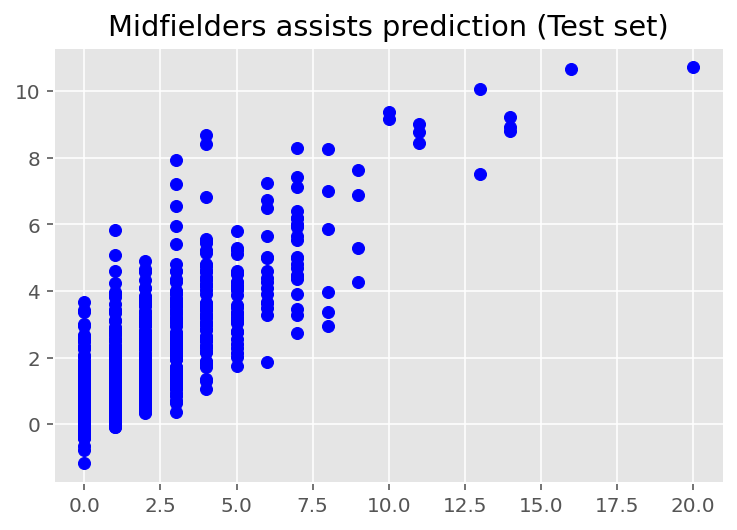

In [434]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Midfielders assists prediction (Test set)')
plt.show()

# Verifying coefficients

In [435]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [436]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients  coef_abs
key_passes               1.425761  1.425761
dribbles_attempts        0.384116  0.384116
successful_dribbles     -0.183577  0.183577
total_shots             -0.176781  0.176781
shots_on_target          0.157477  0.157477
fouls_drawn             -0.124189  0.124189
goals_scored             0.108314  0.108314
rating                   0.107355  0.107355
total_passes             0.095505  0.095505
penalties_scored        -0.066314  0.066314

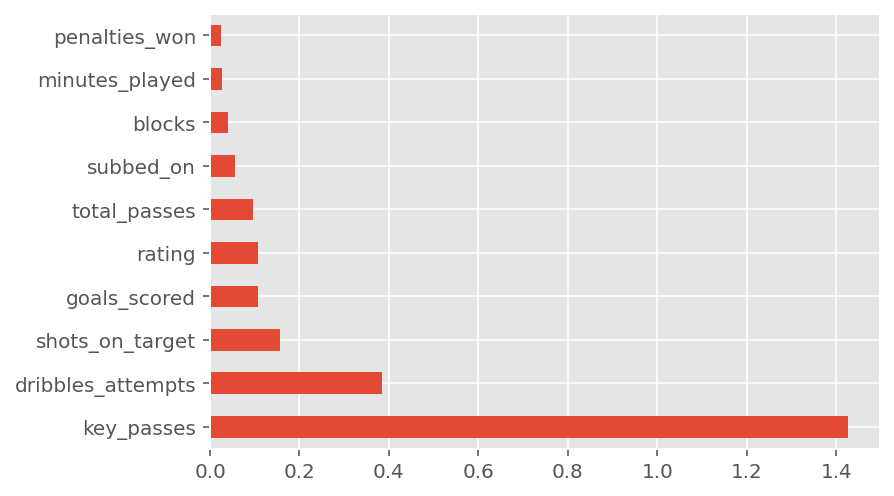

In [437]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

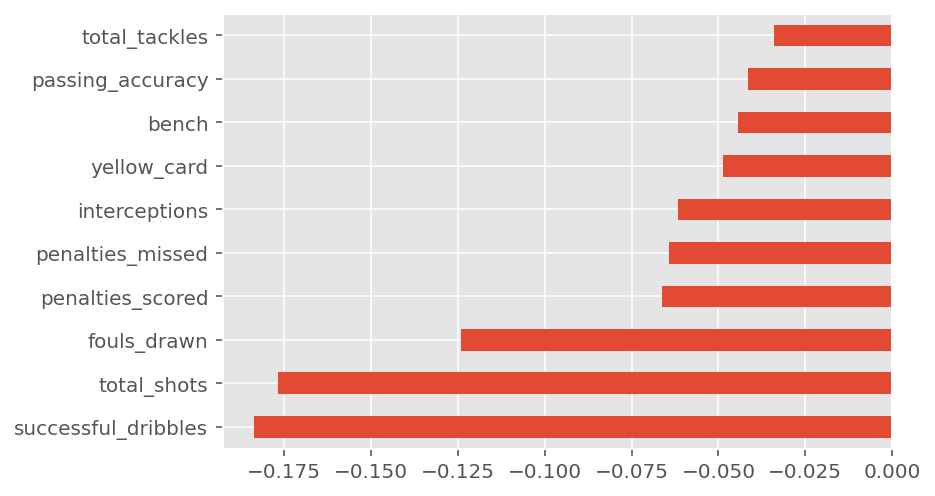

In [438]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

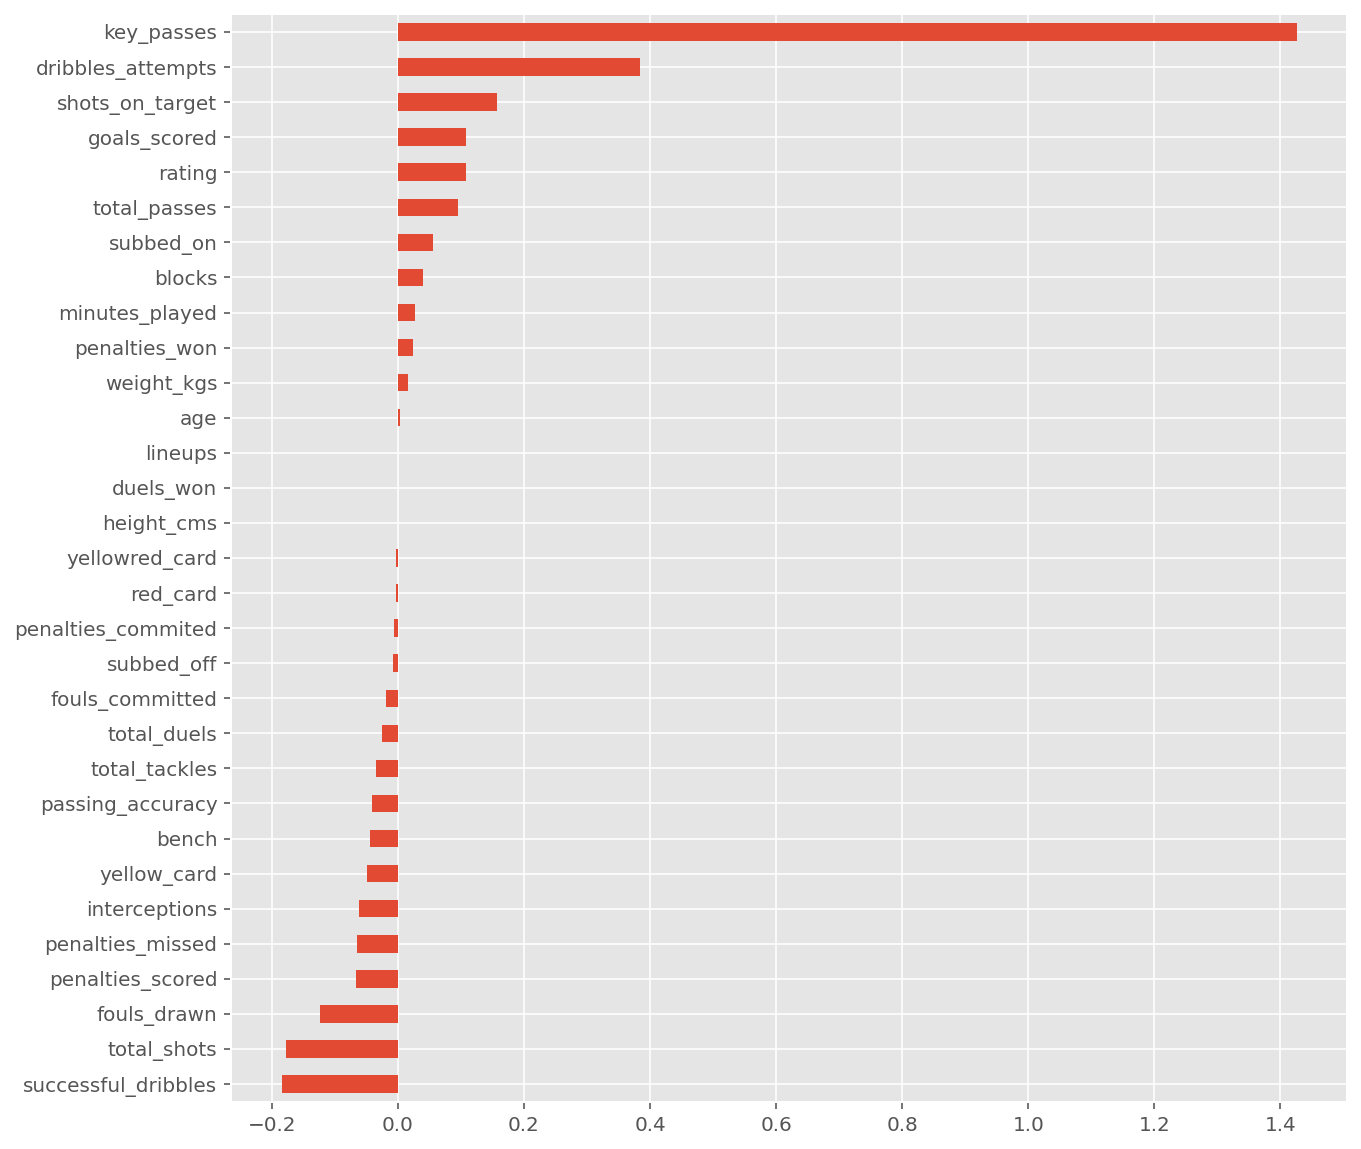

In [439]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

As midfielders participate considerably in goal scoring, would be interesting to compare with the model
used before, for the attackers, and verify if in both cases the coefficients and scores will be the same.

# Predicting goals_scored for the Midfielders

In [451]:
X3 = ls[ls.position == 'Midfielder'].copy()

In [452]:
y3 = X3.pop('goals_scored')

In [453]:
X3 = X3[['rating', 'age', 'height_cms', 'weight_kgs', 'assists', 'total_shots',
       'shots_on_target', 'total_passes', 'key_passes', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited',
       'penalties_missed', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench']]

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25, random_state=1)

In [455]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [456]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.754936929376497
Cross validation score: [0.78625314 0.74452742 0.75048328 0.71084307 0.72289685]
Mean cross validation score: 0.743000752357023
Test Score: 0.7016328123541815


In [457]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 10), max_iter=10000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.005994842503189409
Cross-validated training scores: [0.78328661 0.74603311 0.74928854 0.71479918 0.72608131]
Mean cross-validated training score: 0.7438977475673354
Training score: 0.7537502451235687
Test Score: 0.7048872438499272


In [29]:
# We can verify that although we have good scores, they aren't as high as for the attackers.

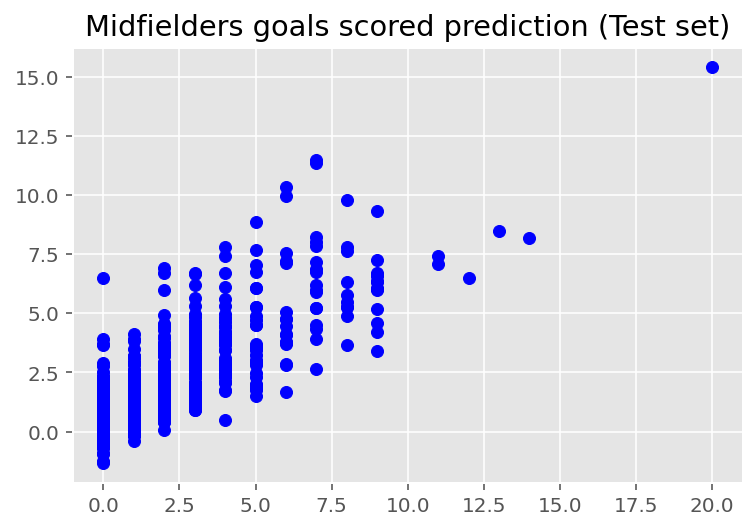

In [458]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Midfielders goals scored prediction (Test set)')
plt.show()

# Verifying coefficients

In [459]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [460]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients  coef_abs
shots_on_target          1.868476  1.868476
minutes_played           0.724921  0.724921
interceptions           -0.258224  0.258224
total_shots             -0.248775  0.248775
total_passes            -0.200622  0.200622
fouls_committed         -0.154452  0.154452
rating                   0.142227  0.142227
lineups                  0.117549  0.117549
key_passes              -0.109025  0.109025
successful_dribbles     -0.106626  0.106626

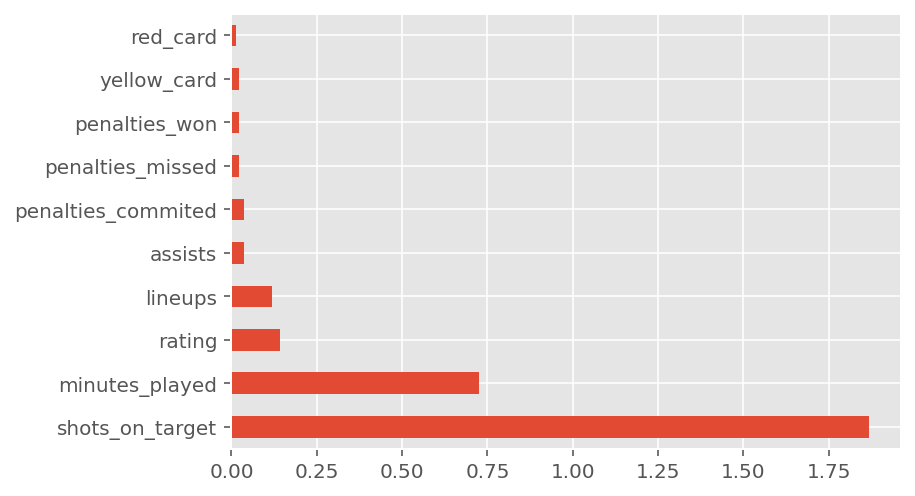

In [461]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

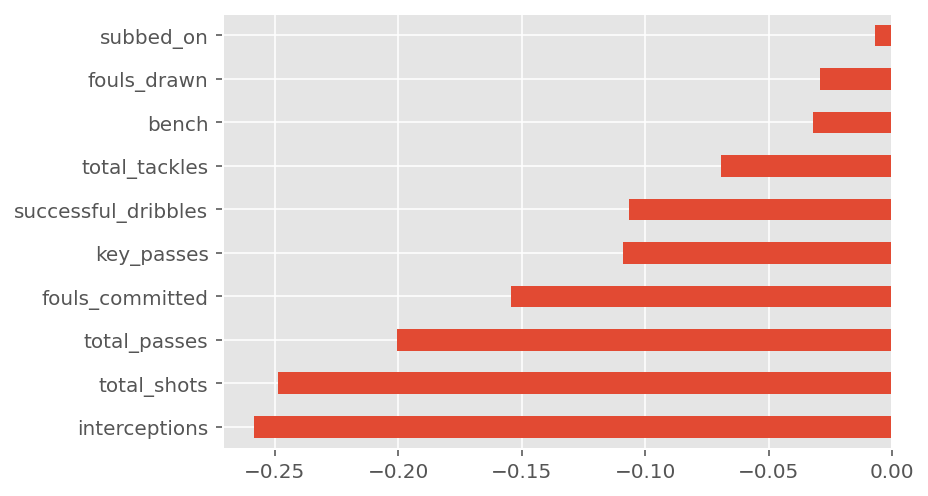

In [462]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

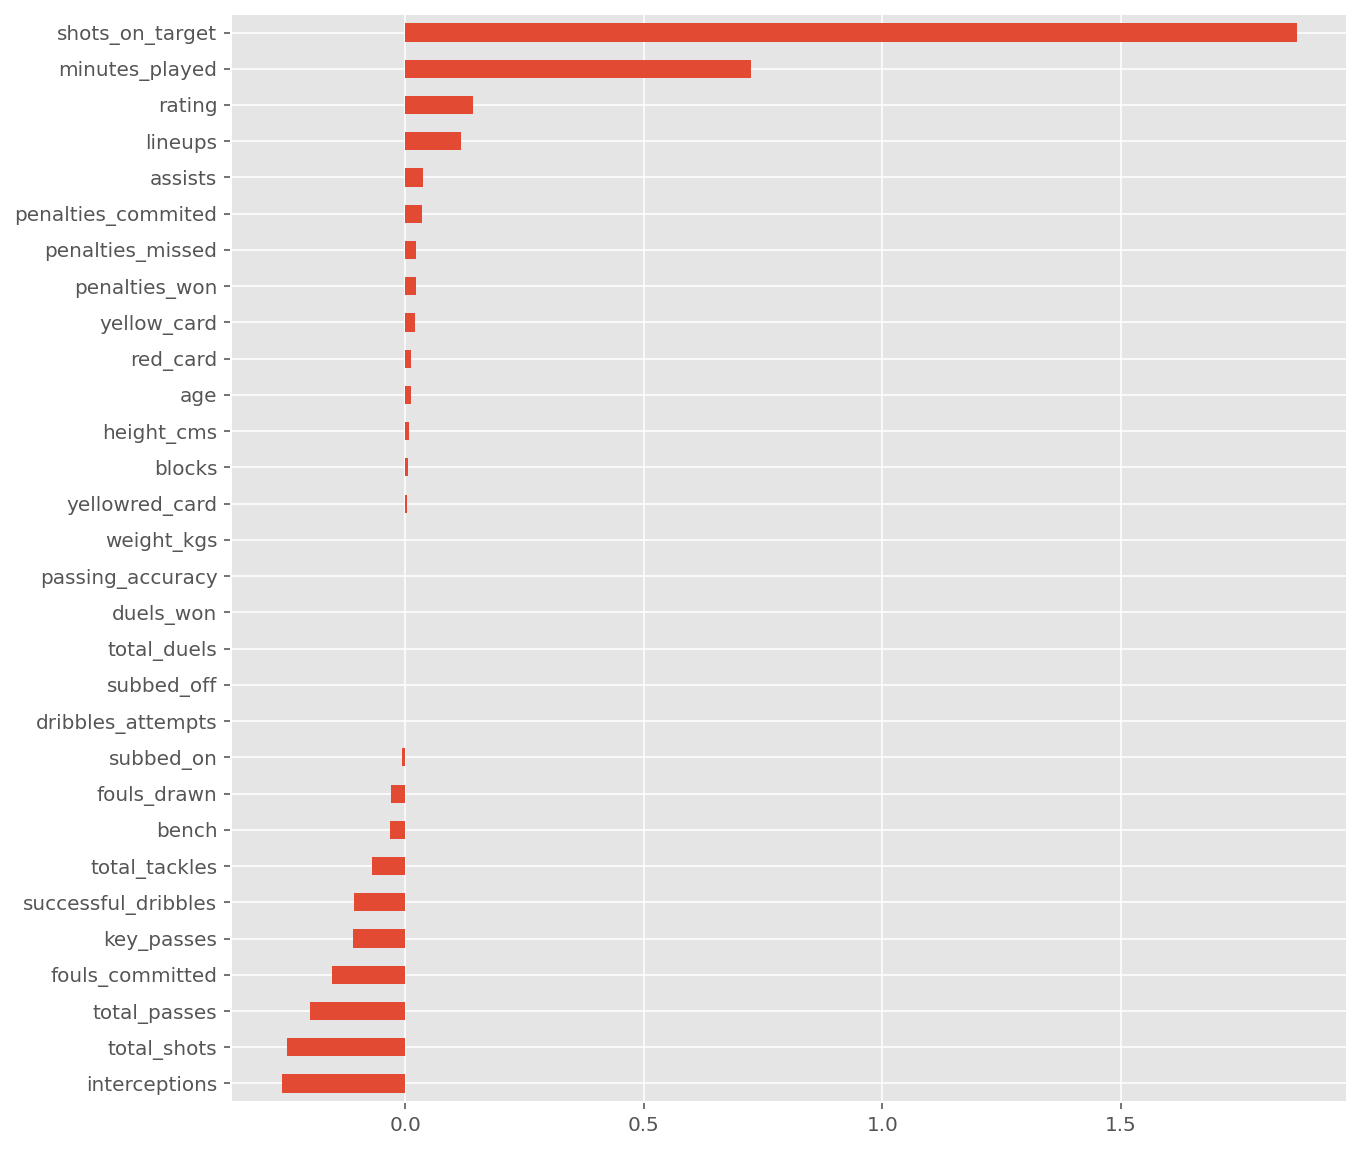

In [463]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

# Predicting goals_conceded for the Goalkeepers

In [517]:
X5 = ls[ls.position == 'Goalkeeper'].copy()

In [518]:
y5 = X5.pop('goals_conceded')

In [519]:
X5 = X5[['age', 'height_cms', 'weight_kgs', 'rating',
       'assists', 'saves', 'total_passes',
       'key_passes', 'passing_accuracy', 'total_tackles', 'blocks',
       'interceptions', 'total_duels', 'duels_won', 'dribbles_attempts',
       'successful_dribbles', 'fouls_drawn', 'fouls_committed', 'yellow_card',
       'red_card', 'yellowred_card', 'penalties_scored', 'penalties_missed', 'penalties_saved',
       'minutes_played', 'lineups', 'subbed_on', 'subbed_off',
       'bench']]

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.25, random_state=1)

In [521]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [522]:
# fit a model
model = LinearRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
# Perform 5-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print('Training Score:', model.score(X_train, y_train))
print('Cross validation score:', cv_scores)
print('Mean cross validation score:', cv_scores.mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9319319284155201
Cross validation score: [0.89749609 0.92102893 0.94042826 0.92744095 0.93372254]
Mean cross validation score: 0.924023354340435
Test Score: 0.9366070438645213


In [523]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 1000), max_iter=10000, cv=5)
# fit the model
model.fit(X_train, y_train)
# get the best alpha
print('Best alpha:', model.alpha_)

alpha = model.alpha_
model = Lasso(alpha=alpha)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

model.fit(X_train, y_train)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))
# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 0.015072253093107555
Cross-validated training scores: [0.89800395 0.91940146 0.94177901 0.92953753 0.93239036]
Mean cross-validated training score: 0.9242224609563434
Training score: 0.931403859476435
Test Score: 0.9366874141821464


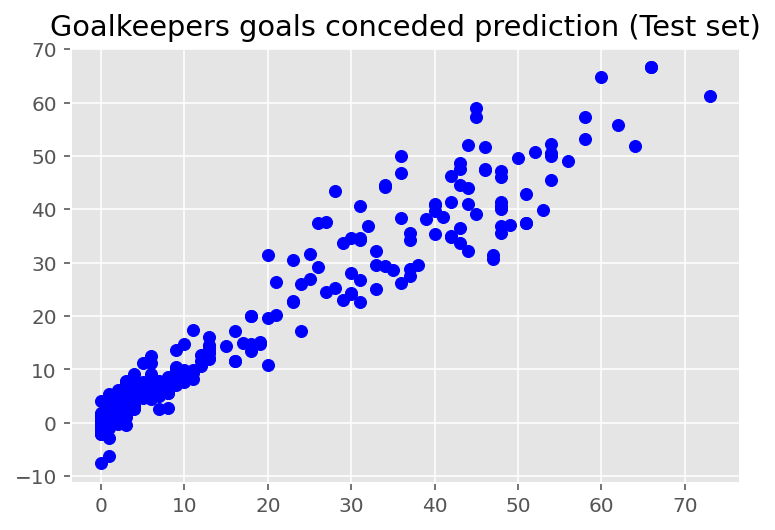

In [524]:
plt.scatter(y_test, model.predict(X_test), color = 'blue')
plt.title('Goalkeepers goals conceded prediction (Test set)')
plt.show()

# Verifying coefficients

In [525]:
df_coef = pd.DataFrame(model.coef_, index=X_train.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
df_coef['coef_abs'] = df_coef.coefficients.abs()

In [526]:
df_coef.sort_values(by='coef_abs', ascending=False).head(10)

coefficients   coef_abs
saves                13.529615  13.529615
total_duels           6.640578   6.640578
duels_won            -5.617827   5.617827
rating               -1.982101   1.982101
total_passes          0.897463   0.897463
minutes_played        0.685366   0.685366
key_passes            0.640795   0.640795
passing_accuracy     -0.501054   0.501054
total_tackles         0.447866   0.447866
interceptions         0.433475   0.433475

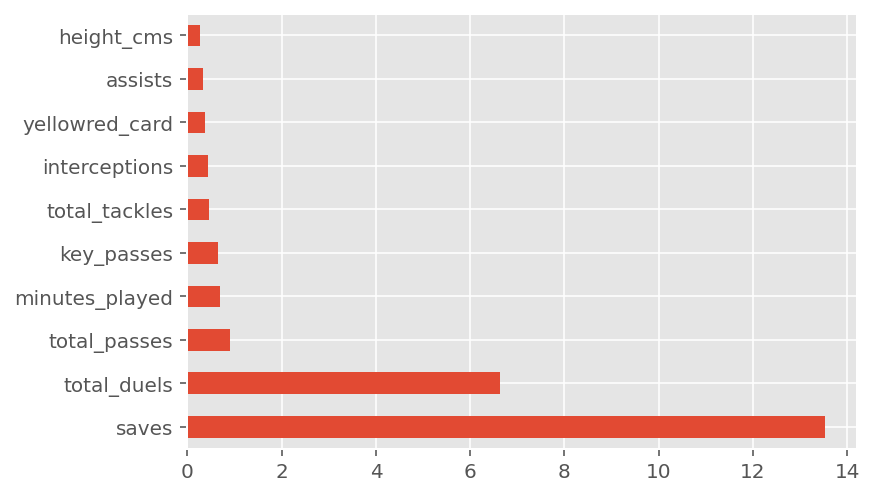

In [528]:
#10 features that impact the most positively
df_coef['coefficients'].sort_values(ascending = False)[:10].plot(kind='barh');

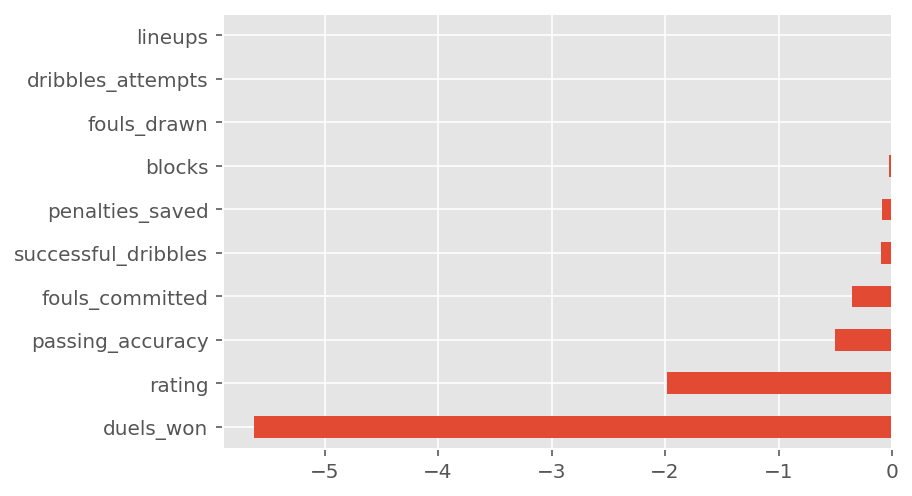

In [529]:
# 10 features that impact the most negatively
df_coef['coefficients'].sort_values(ascending = True)[:10].plot(kind='barh');

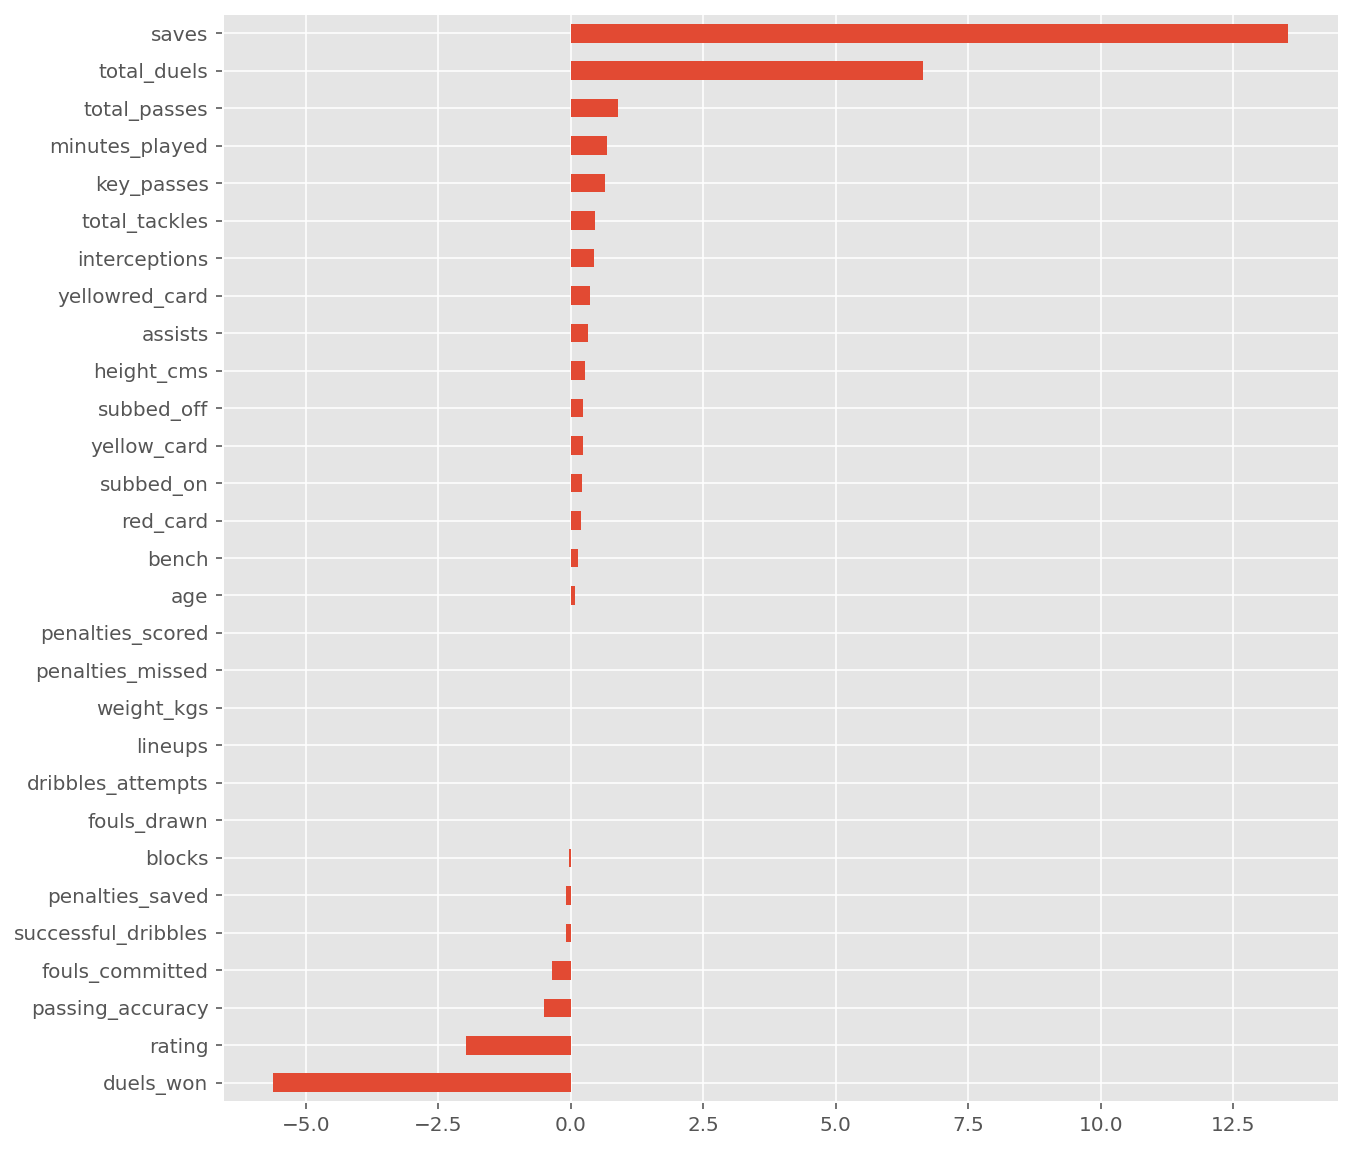

In [527]:
df_coef['coefficients'].sort_values().plot(kind='barh', figsize=(10,10));

# Classification models and predicting high performance players

Models used : Logistic regression and Gridsearch (L1 & L2 penalties), Knn Classifier, Decision Tree Classifier, Random Forrest
Classifier ( shown below only some of the best results )

In [102]:
cr = pd.read_csv('topleagueslastseasons.csv')

In [103]:
cr.rating.describe()

count    17077.000000
mean         6.874672
std          0.381241
min          3.000000
25%          6.680000
50%          6.850000
75%          7.062500
max          9.400000
Name: rating, dtype: float64

In [104]:
def rating_classification(rating, threshold=7.0):
    # over threshold will be considered a high performance
    if rating > threshold:
        return 1
    else:
        return 0

In [105]:
# Creating a column for the binary target variable 'performance'

In [106]:
cr['performance'] = cr['rating'].apply(lambda x: rating_classification(x))

In [107]:
cr.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)

In [108]:
cr = pd.get_dummies(cr, columns= ['position'], drop_first=True)

In [44]:
cr


player_name  age birth_country nationality  height_cms  weight_kgs  \
0      Sergio Rico   27         Spain       Spain       194.0        90.0   
1      Sergio Rico   27         Spain       Spain       194.0        90.0   
2      Sergio Rico   27         Spain       Spain       194.0        90.0   
3      Sergio Rico   27         Spain       Spain       194.0        90.0   
4      Sergio Rico   27         Spain       Spain       194.0        90.0   
...            ...  ...           ...         ...         ...         ...   
17072    R. Mahrez   29        France     Algeria       179.0        67.0   
17073    R. Mahrez   29        France     Algeria       179.0        67.0   
17074    R. Mahrez   29        France     Algeria       179.0        67.0   
17075    R. Mahrez   29        France     Algeria       179.0        67.0   
17076    R. Mahrez   29        France     Algeria       179.0        67.0   

         rating            team_name                 league     season  ...  \
0      6.350000  Paris Saint Germain                Ligue 1  2019-2020  ...   
1      6.751724               Fulham         Premier League  2018-2019  ...   
2      6.695833              Sevilla       Primera Division  2017-2018  ...   
3      7.100000  Paris Saint Germain      Coupe de la Ligue  2019-2020  ...   
4      7.333333  Paris Saint Germain        Coupe de France  2019-2020  ...   
...         ...                  ...                    ...        ...  ...   
17072  7.680000      Manchester City                 FA Cup  2018-2019  ...   
17073  7.300000            Leicester             League Cup  2017-2018  ...   
17074  7.566666            Leicester                 FA Cup  2017-2018  ...   
17075  7.428571      Manchester City  UEFA Champions League  2019-2020  ...   
17076  7.350000      Manchester City  UEFA Champions League  2018-2019  ...   

       appearences  minutes_played  lineups  subbed_on  subbed_off  bench  \
0                2             180        2          0           0     21   
1               29            2610       29          0           0      6   
2               24            2155       23          1           0     15   
3                2             180        2          0           0      2   
4                3             270        3          0           0      3   
...            ...             ...      ...        ...         ...    ...   
17072            5             389        5          0           2      1   
17073            2              88        0          2           0      4   
17074            3             291        3          0           2      1   
17075            7             572        6          1           1      3   
17076            6             388        4          2           1      6   

       performance  position_Defender  position_Goalkeeper  \
0                0                  0                    1   
1                0                  0                    1   
2                0                  0                    1   
3                1                  0                    1   
4                1                  0                    1   
...            ...                ...                  ...   
17072            1                  0                    0   
17073            1                  0                    0   
17074            1                  0                    0   
17075            1                  0                    0   
17076            1                  0                    0   

       position_Midfielder  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
...                    ...  
17072                    0  
17073                    0  
17074                    0  
17075                    0  
17076                    0  

[17077 rows x 46 columns]

In [33]:
cr['performance'].value_counts(normalize=True)

0    0.703636
1    0.296364
Name: performance, dtype: float64

In [46]:
baseline = cr['performance'].value_counts(normalize=True).max()

In [47]:
baseline

0.7036364701059905

In [48]:
cr.performance.value_counts()

0    12016
1     5061
Name: performance, dtype: int64

In [78]:
# As classes are quite unbalanced for our models I'll be using 'class_weight': ['balanced']

In [109]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [139]:
X4 = cr[['age', 'height_cms', 'weight_kgs', 'total_shots',
       'shots_on_target', 'total_passes', 'assists', 'passing_accuracy',
       'total_tackles', 'blocks', 'interceptions', 'total_duels', 'duels_won',
       'dribbles_attempts', 'successful_dribbles', 'fouls_drawn',
       'fouls_committed', 'yellow_card', 'red_card', 'yellowred_card',
       'penalties_won', 'penalties_commited', 'penalties_scored',
       'penalties_missed', 'appearences', 'minutes_played',
       'lineups', 'subbed_on', 'subbed_off', 'bench', 'duels_won', 'key_passes', 'position_Defender','position_Goalkeeper', 'position_Midfielder']]

In [140]:
y4 = cr['performance']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4,
                        stratify=y4, test_size=0.25)

In [142]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [143]:
model = LogisticRegression(max_iter=1000)

In [144]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [145]:
list(model.get_params().keys())

['C',
 'class_weight',
 'dual',
 'fit_intercept',
 'intercept_scaling',
 'l1_ratio',
 'max_iter',
 'multi_class',
 'n_jobs',
 'penalty',
 'random_state',
 'solver',
 'tol',
 'verbose',
 'warm_start']

In [135]:
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l2'],
          'solver': ['lbfgs'],
          'class_weight': ['balanced']}

In [136]:
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  return_train_score=True)

In [137]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'class_weight': ['balanced'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             return_train_score=True)

In [138]:
# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 138.9495494373139, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best estimator C:
138.9495494373139
Best estimator mean cross validated training score:
0.7748099532987608
Best estimator score on the full training set:
0.7767627078941204
Best estimator score on the test set:
0.7831381733021078
Best estimator coefficients:
[[ 0.06508122  0.09415143 -0.02093173 -0.26285283  2.50551709  0.88856731
   0.73941402  0.24455646 -0.17164088 -0.10751636  0.16505229 -6.01316606
   2.85800994 -2.33505201  1.83054269 -0.17303838 -0.57160628 -0.05430141
  -0.22427384 -0.08461995  0.11756575 -0.27459182  0.25573644 -0.07517871
  -3.75512934  6.08914298 -3.96362061 -0.52924801  0.02747573 -0.19376785
   2.85800994  1.091962   -0.03402617  0.12385873 -0.10707193]]


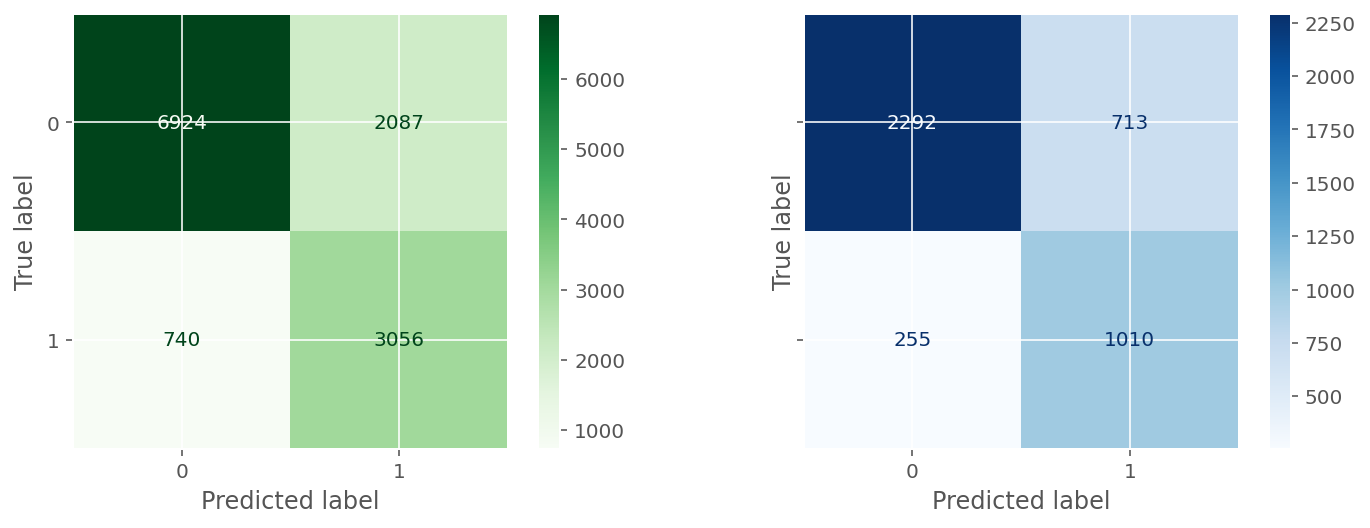

In [87]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs, X_train, y_train, cmap='Greens', ax=ax[0], xticks_rotation=0)
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', ax=ax[1], xticks_rotation=0)
plt.show()

In [81]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)

In [82]:
#gs
tp = np.sum((y_test == 1) & (predictions_test == 1))
fp = np.sum((y_test == 0) & (predictions_test == 1))
tn = np.sum((y_test == 0) & (predictions_test == 0))
fn = np.sum((y_test == 1) & (predictions_test == 0))
print('tp:', tp)
print('fp:', fp)
print('tn:', tn)
print('fn:', fn)
print('Number of correct classifications:', tp+tn)
print('Number of classification errors:', fp+fn)

tp: 1010
fp: 713
tn: 2292
fn: 255
Number of correct classifications: 3302
Number of classification errors: 968


In [85]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      3005
           1       0.59      0.80      0.68      1265

    accuracy                           0.77      4270
   macro avg       0.74      0.78      0.75      4270
weighted avg       0.81      0.77      0.78      4270



We are currently predicting 713 players as 'top performers' when they are actually performing not on a top level - 'normal performers'. This is a number we should aim to reduce to avoid making wrong investments in the wrong players.

# Aiming for Precision

In [185]:
params = {'C': np.logspace(-5, 5, 15),
          'penalty': ['l2']}

In [186]:
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='precision',
                  return_train_score=True)

In [187]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision 

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05]),
                         'penalty': ['l2']},
             return_train_score=True, scoring='precision')

In [188]:
# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

Best Parameters:
{'C': 5.1794746792312125e-05, 'penalty': 'l2'}
Best estimator C:
5.1794746792312125e-05
Best estimator mean cross validated training score:
0.9537525354969574
Best estimator score on the full training set:
0.9312977099236641
Best estimator score on the test set:
0.9302325581395349
Best estimator coefficients:
[[ 1.81915751e-02  3.64828429e-03  6.55592168e-03  3.25740316e-02
   3.98526650e-02  2.60174887e-02  4.78384630e-02  3.88819098e-02
  -3.61333138e-03 -1.81273564e-05  7.15924360e-03  3.29384501e-03
   1.10394864e-02  1.00137042e-02  1.76315402e-02  9.84576883e-03
  -1.10953875e-02 -1.08709267e-02 -1.36897140e-02 -9.08088079e-03
   1.64426301e-02 -1.71206939e-02  3.34687069e-02  1.62578639e-02
  -1.39832499e-02  1.01951432e-03  1.96015186e-03 -5.31599166e-02
  -1.68320932e-02 -5.63433328e-02  1.10394864e-02  4.06182649e-02
   3.63799228e-03 -3.76505329e-03 -4.15038649e-03]]


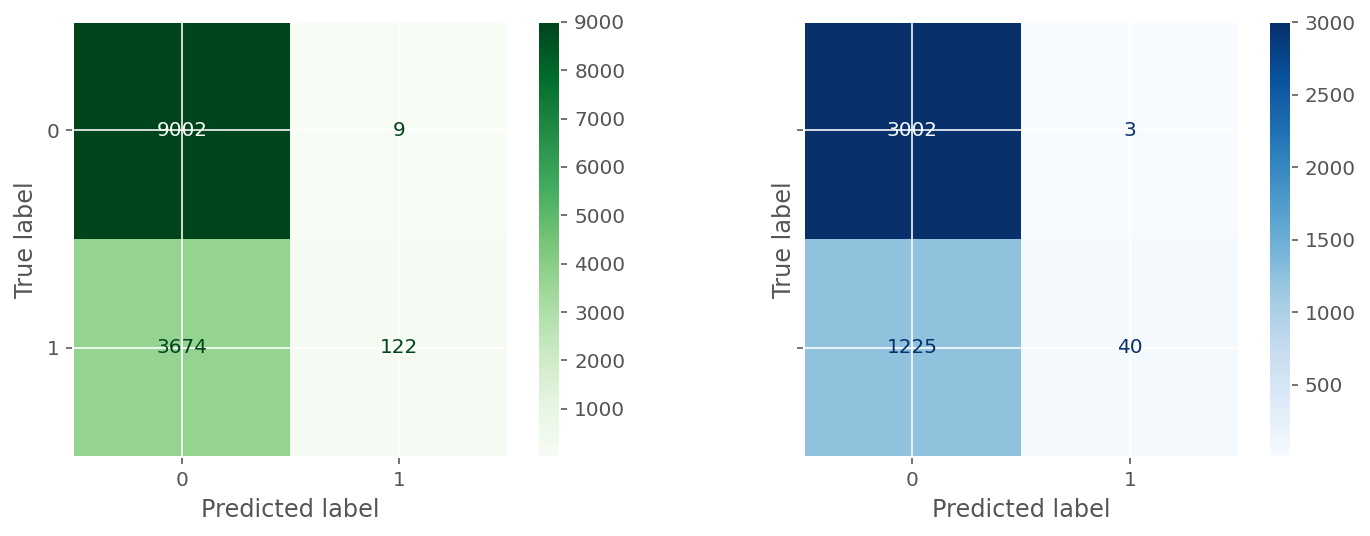

In [189]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(gs, X_train, y_train, cmap='Greens', ax=ax[0], xticks_rotation=0)
plot_confusion_matrix(gs, X_test, y_test, cmap='Blues', ax=ax[1], xticks_rotation=0)
plt.show()

In [190]:
predictions_train = gs.predict(X_train)
predictions_test = gs.predict(X_test)

In [191]:
#gs
tp = np.sum((y_test == 1) & (predictions_test == 1))
fp = np.sum((y_test == 0) & (predictions_test == 1))
tn = np.sum((y_test == 0) & (predictions_test == 0))
fn = np.sum((y_test == 1) & (predictions_test == 0))
print('tp:', tp)
print('fp:', fp)
print('tn:', tn)
print('fn:', fn)
print('Number of correct classifications:', tp+tn)
print('Number of classification errors:', fp+fn)

tp: 40
fp: 3
tn: 3002
fn: 1225
Number of correct classifications: 3042
Number of classification errors: 1228


In [192]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      3005
           1       0.93      0.03      0.06      1265

    accuracy                           0.71      4270
   macro avg       0.82      0.52      0.45      4270
weighted avg       0.78      0.71      0.60      4270



By aiming for precision there are now only 3 players that have been predicted as 'top performer' although in fact
they were 'normal performer'. This better precision scores unfortunately come with a cost which in this case is the loss of many 'top performers' that are now classified as 'normal performers'. We have less 'top performers' to choose from but there is less risk when investing in the predicted 'top performers', the chance of investing in underperforming players is very low. 

# Precision with RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_params = {
    'n_estimators': [50, 100, 200, 300],
             'max_features': [1.0, 0.9, 0.8, 0.7],
             'max_depth': [None]+list(range(1,50,8))}
rf = RandomForestClassifier(random_state=1, class_weight='balanced')
rf_gridsearch = GridSearchCV(rf,
                              rf_params,
                              n_jobs=2,
                              cv=5,
                              verbose=3,
                             scoring='precision')
rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 13.6min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 29.6min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 39.3min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=2,
             param_grid={'max_depth': [None, 1, 9, 17, 25, 33, 41, 49],
                         'max_features': [1.0, 0.9, 0.8, 0.7],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='precision', verbose=3)

In [63]:
rf_fitted = rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  6.1min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 13.4min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed: 29.5min
[Parallel(n_jobs=2)]: Done 640 out of 640 | elapsed: 39.5min finished


In [64]:
predictions_train = rf_fitted.predict(X_train)
predictions_test = rf_fitted.predict(X_test)

In [65]:
#gs
tp = np.sum((y_test == 1) & (predictions_test == 1))
fp = np.sum((y_test == 0) & (predictions_test == 1))
tn = np.sum((y_test == 0) & (predictions_test == 0))
fn = np.sum((y_test == 1) & (predictions_test == 0))
print('tp:', tp)
print('fp:', fp)
print('tn:', tn)
print('fn:', fn)
print('Number of correct classifications:', tp+tn)
print('Number of classification errors:', fp+fn)

tp: 745
fp: 184
tn: 2821
fn: 520
Number of correct classifications: 3566
Number of classification errors: 704


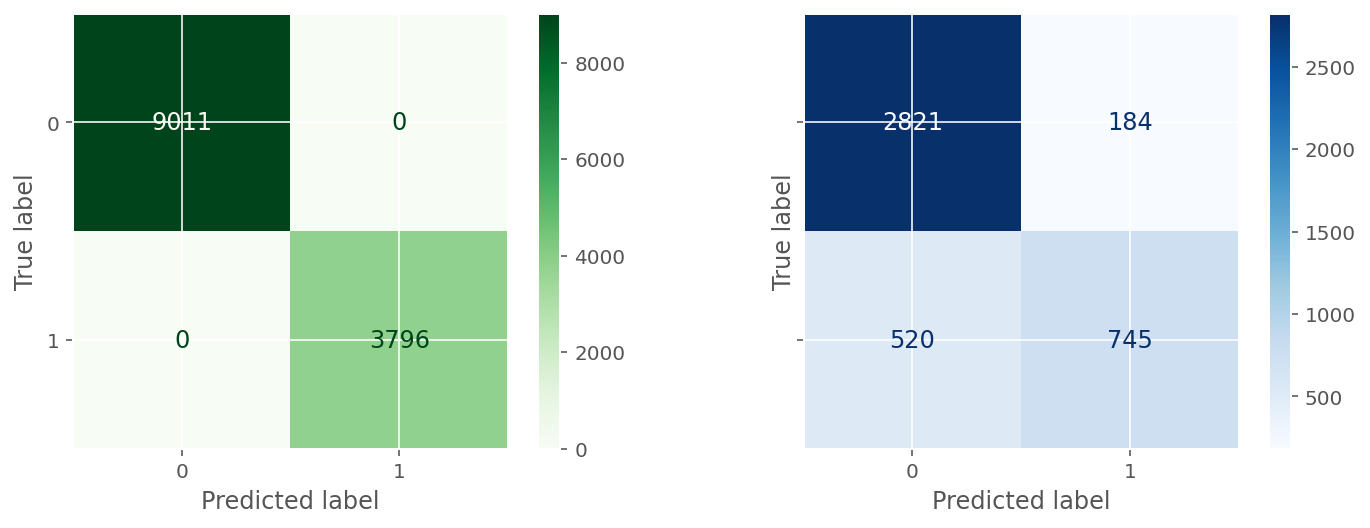

In [68]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(rf_fitted, X_train, y_train, cmap='Greens', ax=ax[0], xticks_rotation=0)
plot_confusion_matrix(rf_fitted, X_test, y_test, cmap='Blues', ax=ax[1], xticks_rotation=0)
for a in ax:
    texts = a.texts
    for text in texts:
        text.set_size(12)
plt.show()

In [69]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3005
           1       0.80      0.59      0.68      1265

    accuracy                           0.84      4270
   macro avg       0.82      0.76      0.78      4270
weighted avg       0.83      0.84      0.83      4270



This is a more balanced approach where we can predict correctly more 'top performers' but with the risk of predicting more players as 'top performers' when they are in fact 'normal performers'.